## ＤＡＲＳＨＡＮ　ＮＡＹＡＫ
## ＤＡＴＡＳＣＩＥＮＣＥ　ＬＣＡ３


# loading dataset

📂 Load all the IoT botnet CSV files.

🔍 Find the target column for classification.

🧮 Count how many “Normal” and “Attack” records there are in total.

📊 Visualize the class balance with a colorful bar chart.

📝 Print a summary so we quickly see if the data is balanced or not!

Found 4 files:
D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_1.csv
D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_2.csv
D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_3.csv
D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_4.csv


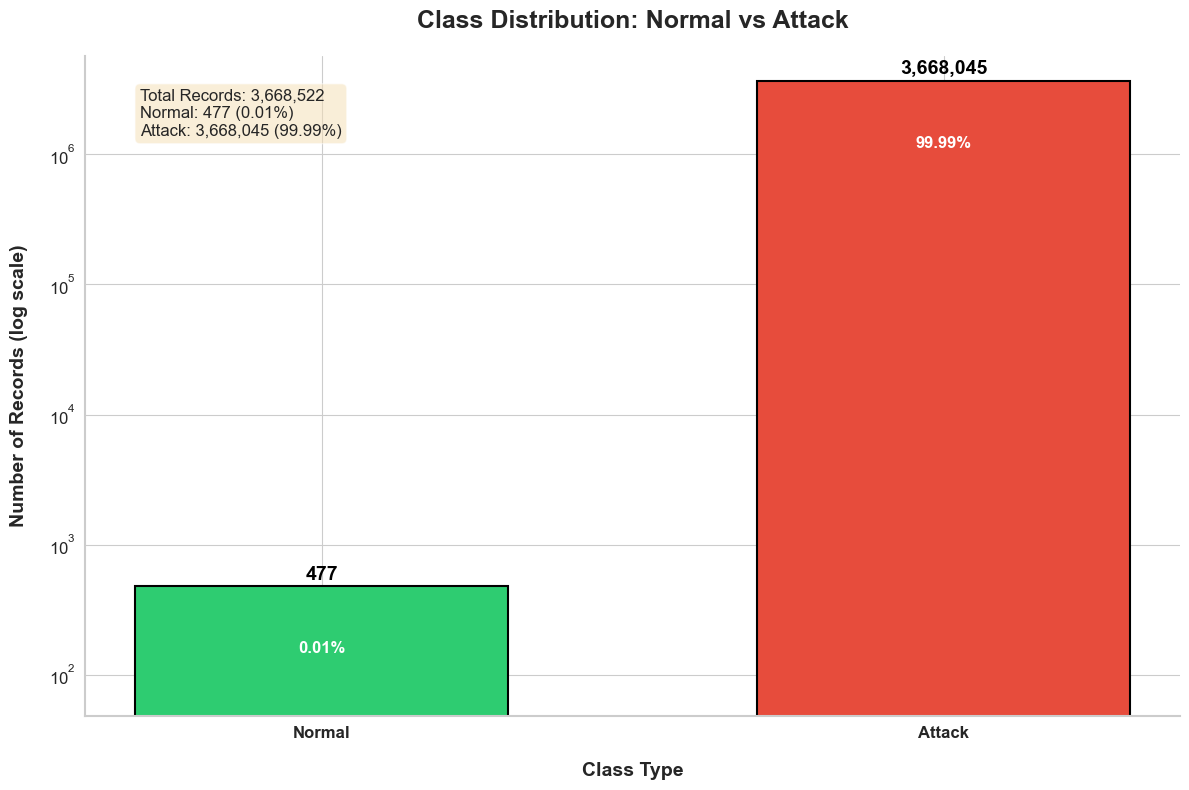


Original dataset: 3,668,522 records

Class Distribution Summary:
Normal: 477 (0.01%)
Attack: 3,668,045 (99.99%)


In [1]:
import pandas as pd
import glob
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")


# Define the path pattern for the dataset filescsv
path_pattern = r"D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_*.csv"

# Find all matching files
files = glob.glob(path_pattern)

print(f"Found {len(files)} files:")
for f in files:
    print(f)

# Identify the target column by peeking into the first file
target_col = None
if files:
    df_peek = pd.read_csv(files[0], nrows=5)
    for candidate in ['attack', 'label', 'category', 'class']:
        if candidate in df_peek.columns:
            target_col = candidate
            break

# Aggregate class counts across all files
class_counts = Counter()
for file in files:
    chunks = pd.read_csv(file, usecols=[target_col], chunksize=100000)
    for chunk in chunks:
        class_counts.update(chunk[target_col].value_counts().to_dict())

total_records = sum(class_counts.values())

# More efficient way to get normal and attack counts
normal_count = class_counts.get(0, 0)
attack_count = class_counts.get(1, 0)

# Create improved visualization
# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create data for plotting
labels = ['Normal', 'Attack']
counts = [normal_count, attack_count]
colors = ['#2ecc71', '#e74c3c']  # More appealing green and red


# Create the bar plot with log scale
ax = plt.subplot(111)
bars = ax.bar(labels, counts, color=colors, width=0.6, 
             edgecolor='black', linewidth=1.5)

# Set log scale with appropriate limits
ax.set_yscale('log')
ax.set_ylim(bottom=max(10, normal_count/10))  # Dynamic lower limit

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height*1.05,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=14, 
            fontweight='bold', color='black')

# Improve aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add percentage labels
total = normal_count + attack_count
for i, bar in enumerate(bars):
    percentage = counts[i]/total*100
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height()/3,
            f'{percentage:.2f}%',
            ha='center', va='center', fontsize=12,
            fontweight='bold', color='white')

# Set titles and labels with better formatting
plt.title('Class Distribution: Normal vs Attack', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Class Type', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Number of Records (log scale)', fontsize=14, fontweight='bold', labelpad=15)

# Adjust tick parameters
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add a text box with summary statistics
textstr = f"Total Records: {total:,}\nNormal: {normal_count:,} ({normal_count/total:.2%})\nAttack: {attack_count:,} ({attack_count/total:.2%})"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nOriginal dataset: {total_records:,} records")
print(f"\nClass Distribution Summary:")
print(f"Normal: {normal_count:,} ({normal_count/(normal_count+attack_count):.2%})")
print(f"Attack: {attack_count:,} ({attack_count/(normal_count+attack_count):.2%})")


## 🚦 What We Did: Stratified Sampling Overview

**🔍 Method Used: Stratified Sampling**

- We applied *stratified sampling* to our dataset, meaning we selected a representative subset while maintaining the original class distribution (e.g., "Normal" vs. "Attack")🟩🟥.
- The sampling fraction was set to 10%, so we aimed to keep about 10% of the original records in the sample.

**🛠️ How It Was Done**

- For each class, we calculated how many samples to take so that the ratio of classes in the sample matches the original dataset.
- We processed each file in chunks (to handle large data efficiently), separated the data by class, and then randomly selected the required number of records from each class.
- All sampled data were combined into a new dataset.

**📊 What It Does**

- This method ensures the sampled dataset is much smaller (faster to process!) but still accurately reflects the true class proportions.
- We visualized the class distribution before and after sampling to confirm that the balance was preserved.
- The sampled dataset was saved for further analysis or modeling.

## 📈 What the Visualization Shows

- The visualizations display the class distribution (counts and percentages) before and after sampling, confirming that the stratified sampling process preserved the original class balance in the reduced dataset.

- The comparison plot makes it easy to see that both the original and sampled datasets have nearly identical class proportions, ensuring sampling did not introduce bias

> *We took a balanced, smaller slice of our data to make future analysis and modeling both efficient and fair!*




STRATIFIED SAMPLING
Target sample size: ~366,852 records (10.0% of original)
Sampling Plan:
- Normal: 47 samples (0.01% of sampled dataset)
- Attack: 366,805 samples (99.99% of sampled dataset)
Processing file: D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_1.csv
  - Sampled 100,000 attack records from 1,000,000
Processing file: D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_2.csv
  - Sampled 100,000 attack records from 1,000,000
Processing file: D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_3.csv
  - Sampled 100,000 attack records from 1,000,000
Processing file: D:\self\skill\UNSW_2018_IoT_Botnet_Full5pc_4.csv
  - Sampled 47 normal records from 477
  - Sampled 66,804 attack records from 668,045

Final dataset after stratified sampling:
Total records: 366,851
Normal: 47 (0.01%)
Attack: 366,804 (99.99%)

Class distribution preservation:
Original Normal %: 0.0130%
Final Normal %: 0.0128%
Difference: 0.0002%


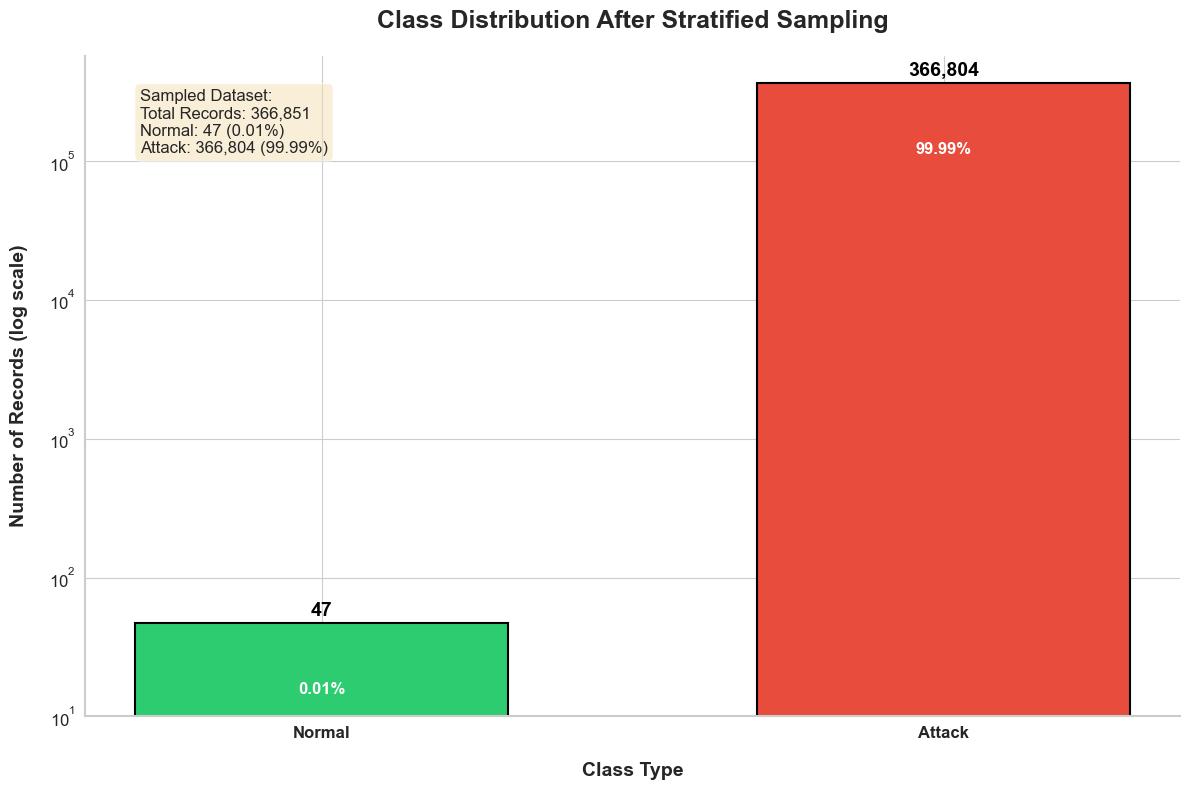

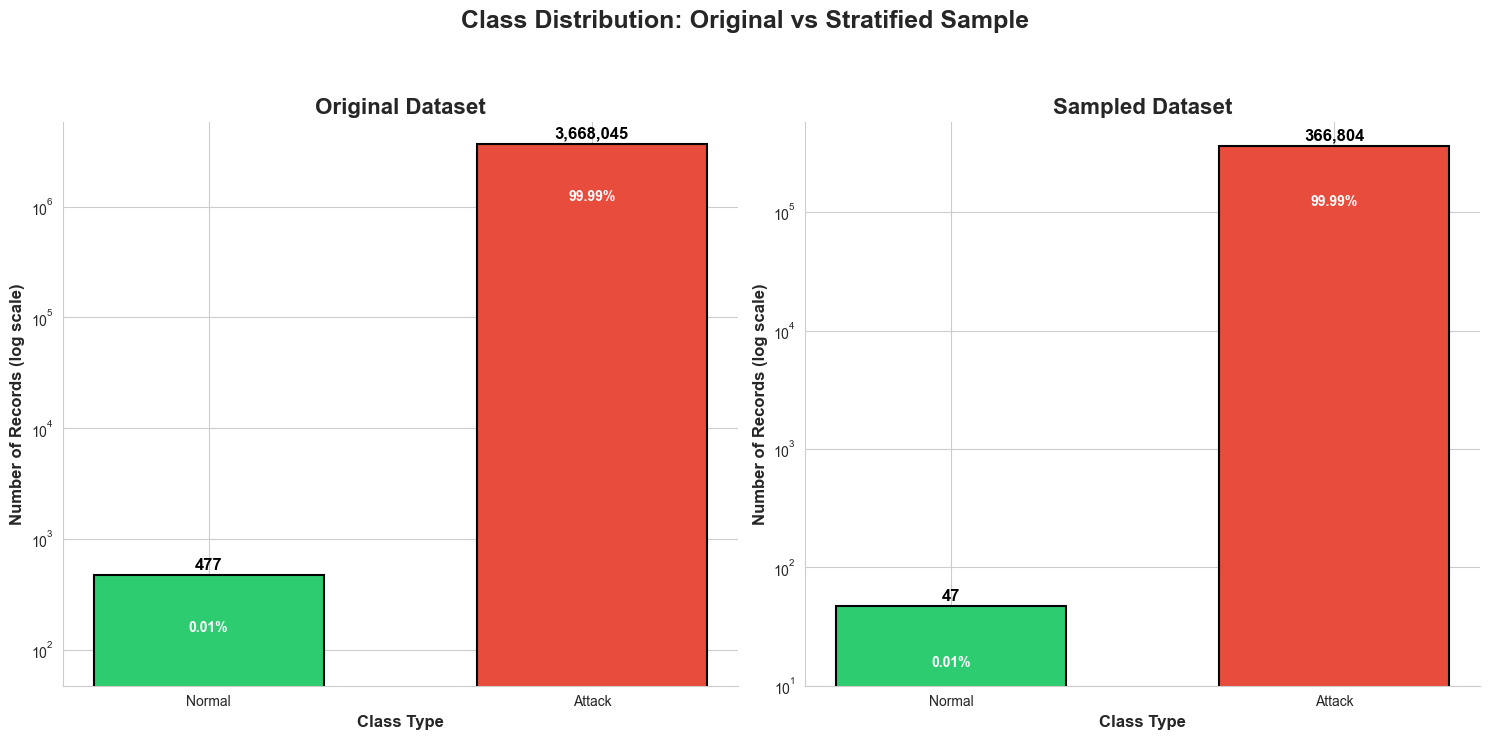

Sampled dataset saved to 'visuals.csv'


<Figure size 1200x800 with 0 Axes>

In [2]:
print("\n" + "="*50)
print("STRATIFIED SAMPLING")
print("="*50)

# Define sampling fraction (adjust as needed)
sampling_fraction = 0.1  # 10% of original data

# Calculate target sample size
target_sample_size = int(total_records * sampling_fraction)
print(f"Target sample size: ~{target_sample_size:,} records ({sampling_fraction:.1%} of original)")

# Calculate samples per class to preserve distribution
if total_records > 0:
    normal_samples = int(normal_count * sampling_fraction)
    attack_samples = int(attack_count * sampling_fraction)
    
    # Adjust to ensure we get exactly the target sample size
    total_calculated = normal_samples + attack_samples
    if total_calculated != target_sample_size:
        # Distribute the difference proportionally
        normal_adjustment = int((target_sample_size - total_calculated) * (normal_count/total_records))
        normal_samples += normal_adjustment
        attack_samples = target_sample_size - normal_samples
    
    print(f"Sampling Plan:")
    print(f"- Normal: {normal_samples:,} samples ({normal_samples/target_sample_size:.2%} of sampled dataset)")
    print(f"- Attack: {attack_samples:,} samples ({attack_samples/target_sample_size:.2%} of sampled dataset)")
else:
    print("Error: No records found in the dataset. Cannot perform sampling.")
    exit()

# Create empty list to store sampled dataframes
sampled_dfs = []

# Process each file and sample proportionally
for file in files:
    print(f"Processing file: {file}")
    
    # Read the file in chunks to handle large files
    df_chunks = pd.read_csv(file, chunksize=200000)
    
    file_normal_data = []
    file_attack_data = []
    
    # Process each chunk
    for chunk in df_chunks:
        # Split by class
        normal_chunk = chunk[chunk[target_col] == 0]
        attack_chunk = chunk[chunk[target_col] == 1]
        
        # Append to respective lists
        if not normal_chunk.empty:
            file_normal_data.append(normal_chunk)
        if not attack_chunk.empty:
            file_attack_data.append(attack_chunk)
    
    # Combine chunks by class
    if file_normal_data:
        file_normal_df = pd.concat(file_normal_data, ignore_index=True)
        normal_in_file = len(file_normal_df)
        
        # Calculate proportion of this file's normal records to all normal records
        if normal_count > 0:
            file_normal_proportion = normal_in_file / normal_count
            file_normal_samples = min(normal_in_file, int(normal_samples * file_normal_proportion))
            
            if file_normal_samples > 0:
                normal_sampled = file_normal_df.sample(n=file_normal_samples, random_state=42)
                sampled_dfs.append(normal_sampled)
                print(f"  - Sampled {file_normal_samples:,} normal records from {normal_in_file:,}")
    
    if file_attack_data:
        file_attack_df = pd.concat(file_attack_data, ignore_index=True)
        attack_in_file = len(file_attack_df)
        
        # Calculate proportion of this file's attack records to all attack records
        if attack_count > 0:
            file_attack_proportion = attack_in_file / attack_count
            file_attack_samples = min(attack_in_file, int(attack_samples * file_attack_proportion))
            
            if file_attack_samples > 0:
                attack_sampled = file_attack_df.sample(n=file_attack_samples, random_state=42)
                sampled_dfs.append(attack_sampled)
                print(f"  - Sampled {file_attack_samples:,} attack records from {attack_in_file:,}")

# Combine all sampled data
if sampled_dfs:
    sampled_df = pd.concat(sampled_dfs, ignore_index=True)
    
    # Verify final class distribution
    final_normal_count = len(sampled_df[sampled_df[target_col] == 0])
    final_attack_count = len(sampled_df[sampled_df[target_col] == 1])
    final_total = len(sampled_df)
    
    print("\nFinal dataset after stratified sampling:")
    print(f"Total records: {final_total:,}")
    print(f"Normal: {final_normal_count:,} ({final_normal_count/final_total:.2%})")
    print(f"Attack: {final_attack_count:,} ({final_attack_count/final_total:.2%})")
    
    # Verify the class proportions are maintained
    original_normal_pct = normal_count / total_records
    final_normal_pct = final_normal_count / final_total
    proportion_diff = abs(original_normal_pct - final_normal_pct)
    
    print(f"\nClass distribution preservation:")
    print(f"Original Normal %: {original_normal_pct:.4%}")
    print(f"Final Normal %: {final_normal_pct:.4%}")
    print(f"Difference: {proportion_diff:.4%}")
else:
    print("Error: No data was sampled. Check the dataset files and target column.")

# Visualization and saving sampled dataset
if sampled_dfs:
    sampled_df = pd.concat(sampled_dfs, ignore_index=True)
    
    # Verify final class distribution
    final_normal_count = len(sampled_df[sampled_df[target_col] == 0])
    final_attack_count = len(sampled_df[sampled_df[target_col] == 1])
    final_total = len(sampled_df)

    # Verify the class proportions are maintained
    original_normal_pct = normal_count / total_records
    final_normal_pct = final_normal_count / final_total
    proportion_diff = abs(original_normal_pct - final_normal_pct)
    
    # Create visualization for the sampled dataset
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Create data for plotting
    labels = ['Normal', 'Attack']
    counts = [final_normal_count, final_attack_count]
    colors = ['#2ecc71', '#e74c3c']  # Same green and red colors

    # Create the bar plot with log scale
    ax = plt.subplot(111)
    bars = ax.bar(labels, counts, color=colors, width=0.6, 
                 edgecolor='black', linewidth=1.5)

    # Set log scale with appropriate limits
    ax.set_yscale('log')
    ax.set_ylim(bottom=max(10, final_normal_count/10))  # Dynamic lower limit

    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height*1.05,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=14, 
                fontweight='bold', color='black')

    # Improve aesthetics
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    # Add percentage labels
    total = final_normal_count + final_attack_count
    for i, bar in enumerate(bars):
        percentage = counts[i]/total*100
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height()/3,
                f'{percentage:.2f}%',
                ha='center', va='center', fontsize=12,
                fontweight='bold', color='white')

    # Set titles and labels with better formatting
    plt.title('Class Distribution After Stratified Sampling', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Class Type', fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel('Number of Records (log scale)', fontsize=14, fontweight='bold', labelpad=15)

    # Adjust tick parameters
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)

    # Add a text box with summary statistics
    textstr = f"Sampled Dataset:\nTotal Records: {final_total:,}\nNormal: {final_normal_count:,} ({final_normal_count/final_total:.2%})\nAttack: {final_attack_count:,} ({final_attack_count/final_total:.2%})"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()
    
    # Optional: Create a comparison visualization (original vs sampled)
    plt.figure(figsize=(15, 7))
    
    # Original dataset plot
    plt.subplot(1, 2, 1)
    ax1 = plt.gca()
    bars1 = ax1.bar(['Normal', 'Attack'], [normal_count, attack_count], 
                   color=['#2ecc71', '#e74c3c'], width=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    ax1.set_yscale('log')
    ax1.set_ylim(bottom=max(10, normal_count/10))
    
    # Add count labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height*1.05,
                f'{int(height):,}', ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')
    
    # Add percentage labels
    orig_total = normal_count + attack_count
    for i, bar in enumerate(bars1):
        percentage = [normal_count/orig_total*100, attack_count/orig_total*100][i]
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height()/3,
                f'{percentage:.2f}%', ha='center', va='center', 
                fontsize=10, fontweight='bold', color='white')
    ax1.set_title('Original Dataset', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Class Type', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Records (log scale)', fontsize=12, fontweight='bold')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Sampled dataset plot
    plt.subplot(1, 2, 2)
    ax2 = plt.gca()
    bars2 = ax2.bar(['Normal', 'Attack'], [final_normal_count, final_attack_count], 
                   color=['#2ecc71', '#e74c3c'], width=0.6, 
                   edgecolor='black', linewidth=1.5)
    
    ax2.set_yscale('log')
    ax2.set_ylim(bottom=max(10, final_normal_count/10))
    
    # Add count labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height*1.05,
                f'{int(height):,}', ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')
    
    # Add percentage labels
    for i, bar in enumerate(bars2):
        percentage = [final_normal_count/final_total*100, final_attack_count/final_total*100][i]
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height()/3,
                f'{percentage:.2f}%', ha='center', va='center', 
                fontsize=10, fontweight='bold', color='white')
    
    ax2.set_title('Sampled Dataset', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Class Type', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Records (log scale)', fontsize=12, fontweight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.suptitle('Class Distribution: Original vs Stratified Sample', 
                fontsize=18, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()
    
    # Optional: Create a box plot for a numerical feature in the sampled dataset
    numerical_cols = sampled_df.select_dtypes(include=['number']).columns.tolist()
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    
    if numerical_cols:
        feature_to_plot = numerical_cols[0]  # Choose first numerical feature
        
        plt.figure(figsize=(12, 8))
        
        # Map target values to class labels
        class_labels = sampled_df[target_col].map({0: 'Normal', 1: 'Attack'})
        # Save the sampled dataset for next steps
        sampled_df.to_csv(r'D:\self\skill\visuals.csv', index=False)
        print("Sampled dataset saved to 'visuals.csv'")

else:
    print("Error: No data was sampled. Check the dataset files and target column.")




## Data Overview and Quality Check 📊

- **📥 Loaded:** Sampled dataset from `visuals.csv`.
- **🔢 Checked shape:** Displayed the number of rows and columns.
- **🧮 Counted features:** Listed the number of features (excluding the target).
- **📈 Viewed stats:** Summarized basic statistics for all numerical columns.
- **🕵️‍♂️ Missing values:** Scanned for missing data—none found.

Your sampled dataset is structured, summarized, and ready for analysis! 🚀


In [3]:
# Load the sampled dataset
sampled_df = pd.read_csv(r'D:\self\skill\visuals.csv')

# Basic dataset information
print(f"Dataset shape: {sampled_df.shape}")
print(f"Number of features: {sampled_df.shape[1]-1}")  # Excluding target column

# Display basic statistics
print("\nBasic statistics of numerical features:")
display(sampled_df.describe())

# Check for missing values
missing_values = sampled_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0] if sum(missing_values) > 0 else "No missing values found")


Dataset shape: (366851, 46)
Number of features: 45

Basic statistics of numerical features:


,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,3.668510e+05,3.668510e+05,366851.000000,366851.000000,366851.000000,3.668510e+05,366851.000000,3.668510e+05,366851.000000,366851.000000,...,366851.000000,3.668510e+05,366851.000000,366851.000000,366851.000000,3.668510e+05,3.668510e+05,366851.000000,366851.000000,366851.000000
mean,1.833736e+06,1.528050e+09,1.491262,2.095308,7.619001,7.687271e+02,3.133994,1.528050e+09,121299.333869,20.342727,...,737.286160,3.273462e+02,287.481181,92.439178,82.544693,4.451778e+02,5.568401e+02,642.062077,585.919616,0.999872
std,1.059245e+06,2.589776e+05,0.866487,0.999244,75.052915,6.790325e+04,1.186756,2.589785e+05,75773.914613,21.331237,...,745.980915,8.389379e+03,4300.231568,18.198638,24.408820,1.399225e+04,1.748577e+04,443.316613,449.288121,0.011318
min,1.000000e+00,1.526344e+09,1.000000,1.000000,1.000000,6.000000e+01,1.000000,1.526344e+09,2.000000,0.000000,...,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000
25%,9.173455e+05,1.528085e+09,1.000000,1.000000,5.000000,4.200000e+02,3.000000,1.528085e+09,54959.000000,12.570258,...,500.000000,2.359000e-01,0.243473,100.000000,69.000000,2.314765e-01,2.456290e-01,324.000000,292.000000,1.000000
50%,1.833645e+06,1.528096e+09,1.000000,3.000000,7.000000,6.000000e+02,4.000000,1.528096e+09,117627.000000,15.510030,...,700.000000,3.896170e-01,0.398232,100.000000,100.000000,3.780580e-01,3.938500e-01,600.000000,500.000000,1.000000
75%,2.750718e+06,1.528099e+09,2.000000,3.000000,9.000000,7.700000e+02,4.000000,1.528099e+09,184957.000000,27.107237,...,920.000000,5.725510e-01,0.578874,100.000000,100.000000,5.725290e-01,5.769350e-01,828.000000,800.000000,1.000000
max,3.668521e+06,1.529381e+09,8.000000,5.000000,34801.000000,3.212362e+07,10.000000,1.529381e+09,262200.000000,1940.756348,...,244425.000000,2.714290e+06,666667.000000,100.000000,100.000000,2.000000e+06,2.000000e+06,103159.000000,117939.000000,1.000000



Missing values per column:
No missing values found


## SINCE THERE ARE NO MISSING VALUES FOUND WE WILL SKIP DATA PREPROCESSING

since there are no missing/NaN/duplicate values. We can proceed without performing Data Preprocessing



## What the below Feature Histograms Show 📊

- **🟩🟥 Compared classes:** Each histogram shows how a feature’s values are distributed for "Normal" (green) and "Attack" (red) records.
- **🔝 Top features:** Plotted the 9 most important numerical features.
- **🔍 Visual insight:** You can quickly spot differences or overlaps in how each class behaves for each feature.
- **📉 No smoothing:** Pure histograms—no KDE lines—so you see the raw data distribution.
- **🤔 Why useful:** Helps identify which features best separate the classes and may be most valuable for modeling.

These histograms let you visually compare how "Normal" and "Attack" data differ across key features—great for feature selection and understanding your dataset!


In [4]:
# Select numerical features (excluding target)
numerical_features = sampled_df.select_dtypes(include=['number']).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)


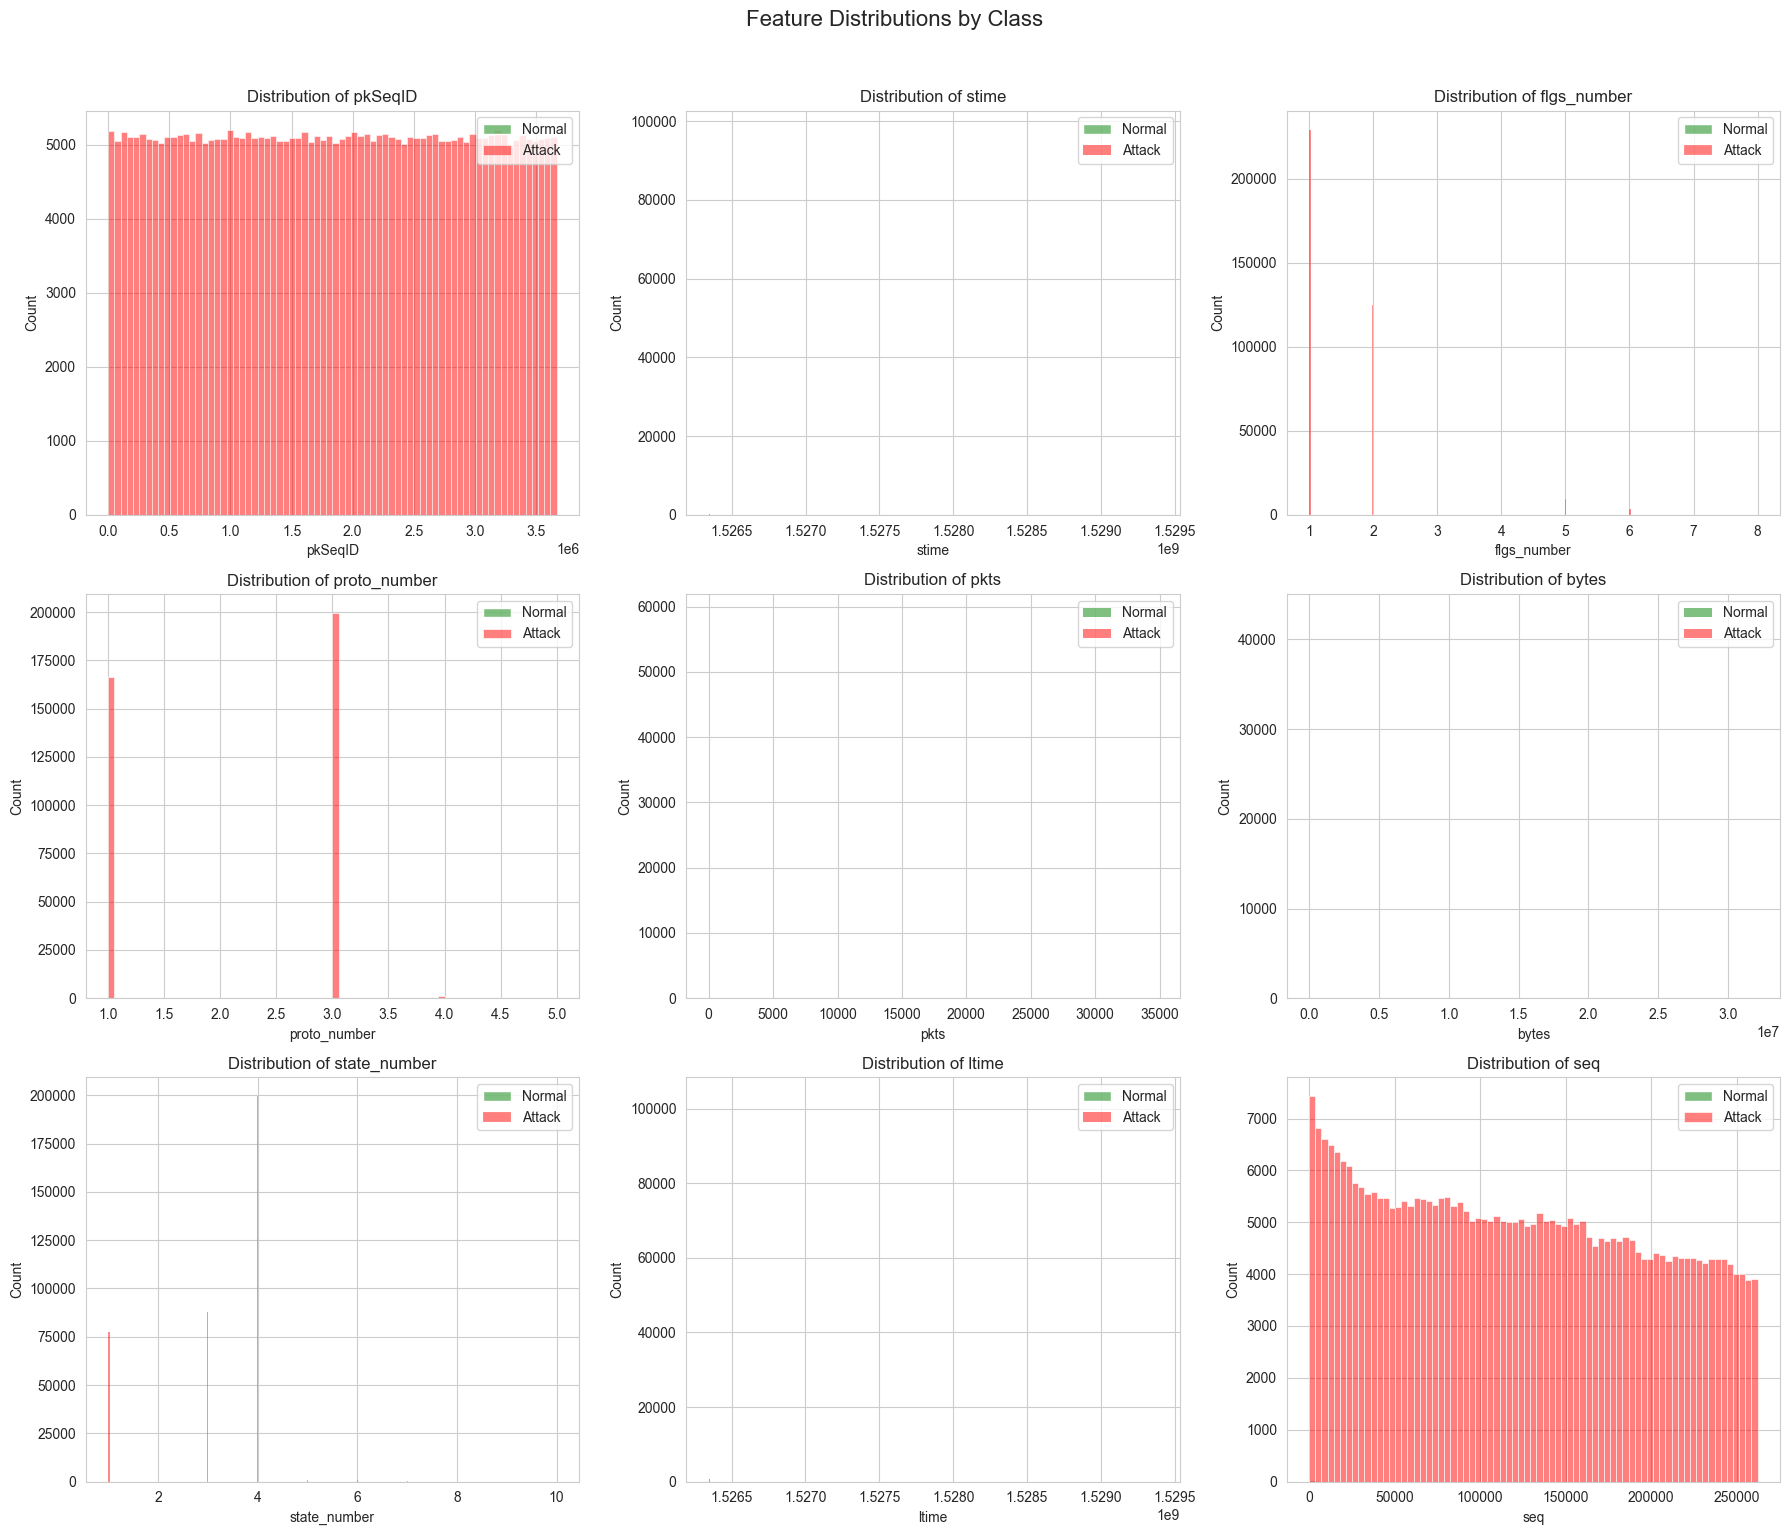

In [5]:
# Create histograms for top features without KDE
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features[:9]):  # Top 9 features
    plt.subplot(3, 3, i+1)
    
    # Plot histograms for each class (without kde=True)
    sns.histplot(data=sampled_df[sampled_df[target_col]==0], x=feature, 
                 color='green', alpha=0.5, label='Normal')
    sns.histplot(data=sampled_df[sampled_df[target_col]==1], x=feature, 
                 color='red', alpha=0.5, label='Attack')
    
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.tight_layout()

plt.suptitle('Feature Distributions by Class', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()




## What the Correlation Matrix Shows 🔥

- **🔗 Displays relationships:** Shows how strongly each pair of numerical features is related (correlated).
- **🎨 Warm colors:** Uses a yellow-orange-red palette—brighter colors mean stronger positive or negative correlations.
- **🟧 Full matrix:** Every feature compared with every other, so you see the whole picture.
- **📏 Range:** Values go from -1 (strong negative) to +1 (strong positive); 0 means no correlation.
- **💡 Why useful:** Helps spot redundant features, multicollinearity, or interesting patterns for feature selection and deeper analysis.

This heatmap gives you a quick, visual overview of how your features relate to each other—great for understanding structure and improving your models!



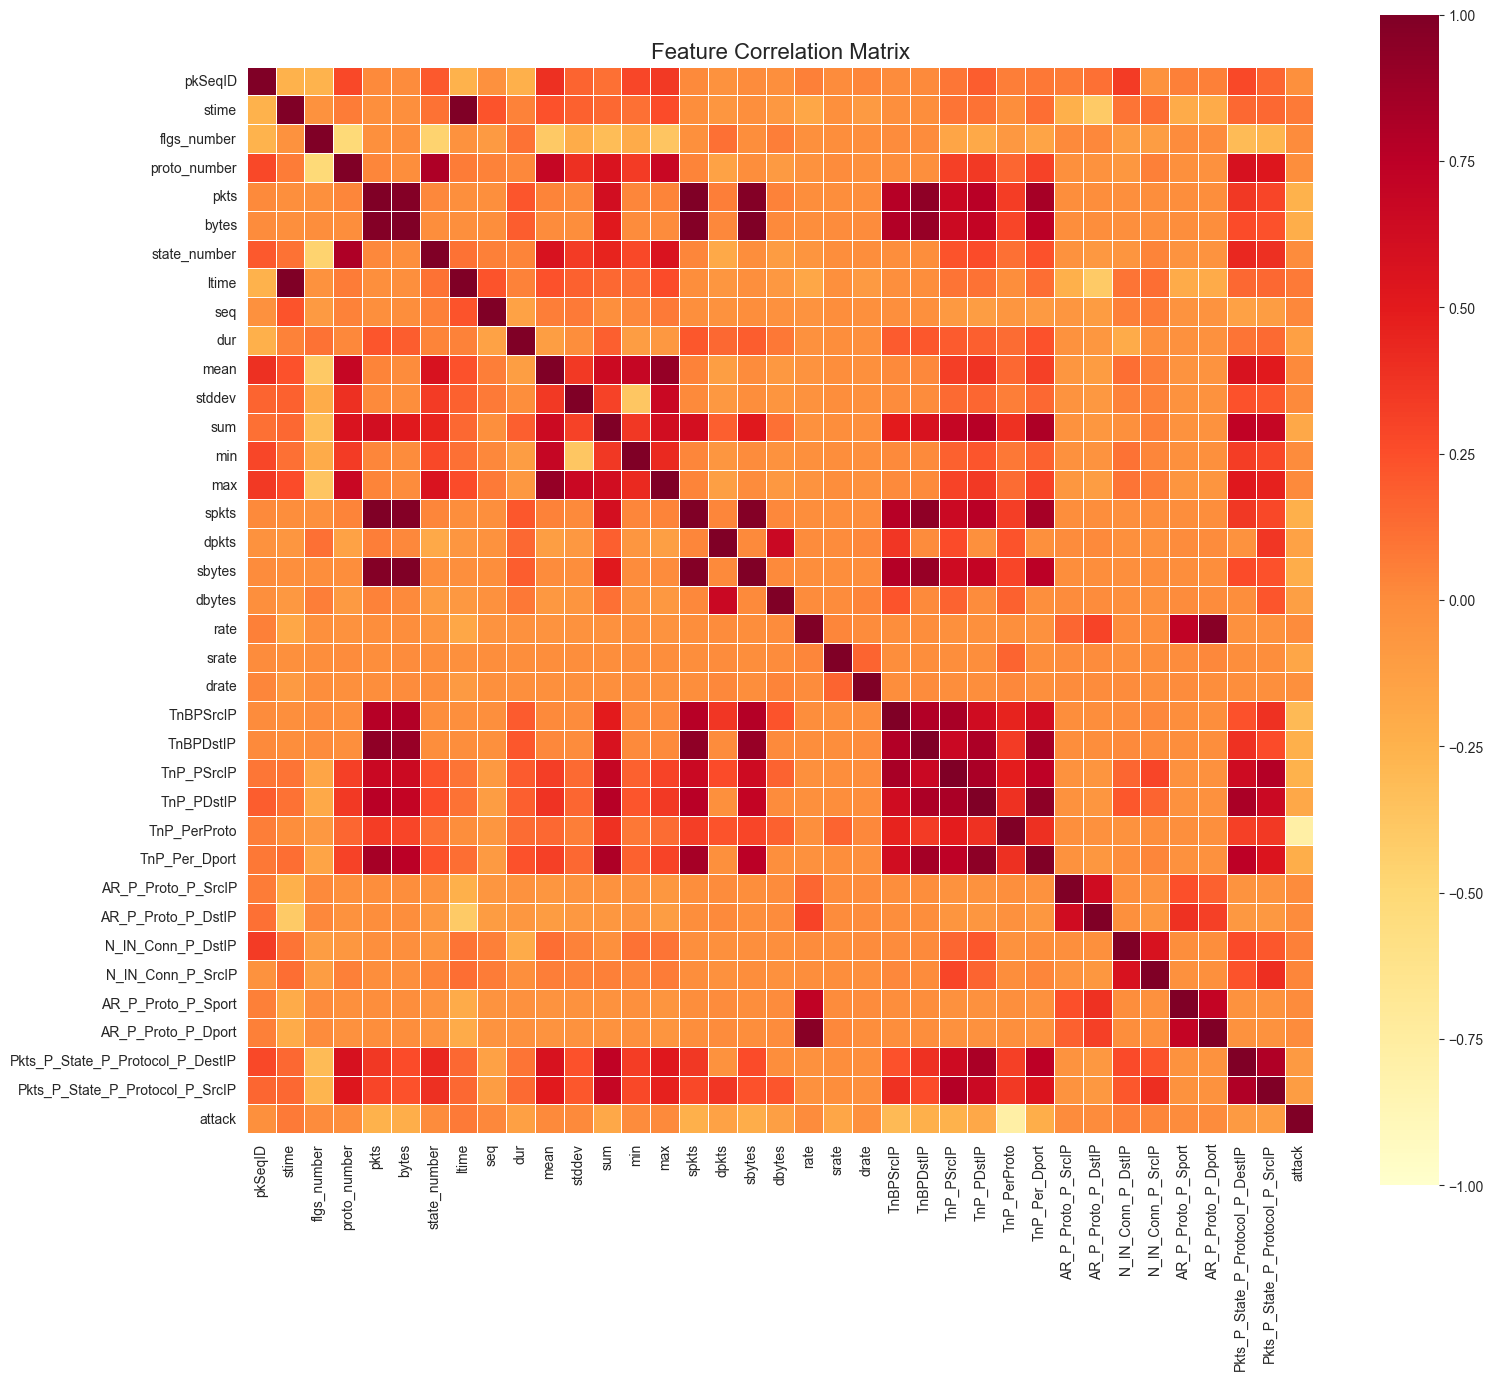

In [6]:
# Correlation matrix
corr_matrix = sampled_df.corr(numeric_only=True)

# Remove the mask to show the full square matrix
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Remove this line

plt.figure(figsize=(16, 14))

# Change to warm color palette
# Option 1: Use a predefined warm colormap
cmap = plt.cm.YlOrRd  # Yellow-Orange-Red colormap

# Option 2: Create a custom warm palette
# cmap = sns.color_palette("YlOrBr", as_cmap=True)  # Yellow-Orange-Brown

# Draw the full heatmap (without mask)
sns.heatmap(corr_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=False, fmt='.2f')

plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


## What the Scatter Plot Matrix Shows 🟢🔴

- **🔝 Top features:** Plots the four features most strongly correlated with the target.
- **🟩🟥 Class colors:** "Normal" points are green, "Attack" points are red.
- **🔗 Pairwise relationships:** Each plot shows how two features relate, helping you spot clusters, trends, or separations between classes.
- **📊 Diagonal histograms:** The diagonal shows the distribution of each feature.
- **👀 Why useful:** Makes it easy to see if certain feature combinations help separate "Normal" from "Attack" data—great for feature selection and understanding your data’s structure.

This matrix gives you a visual overview of how your most important features interact and how well they distinguish between classes!


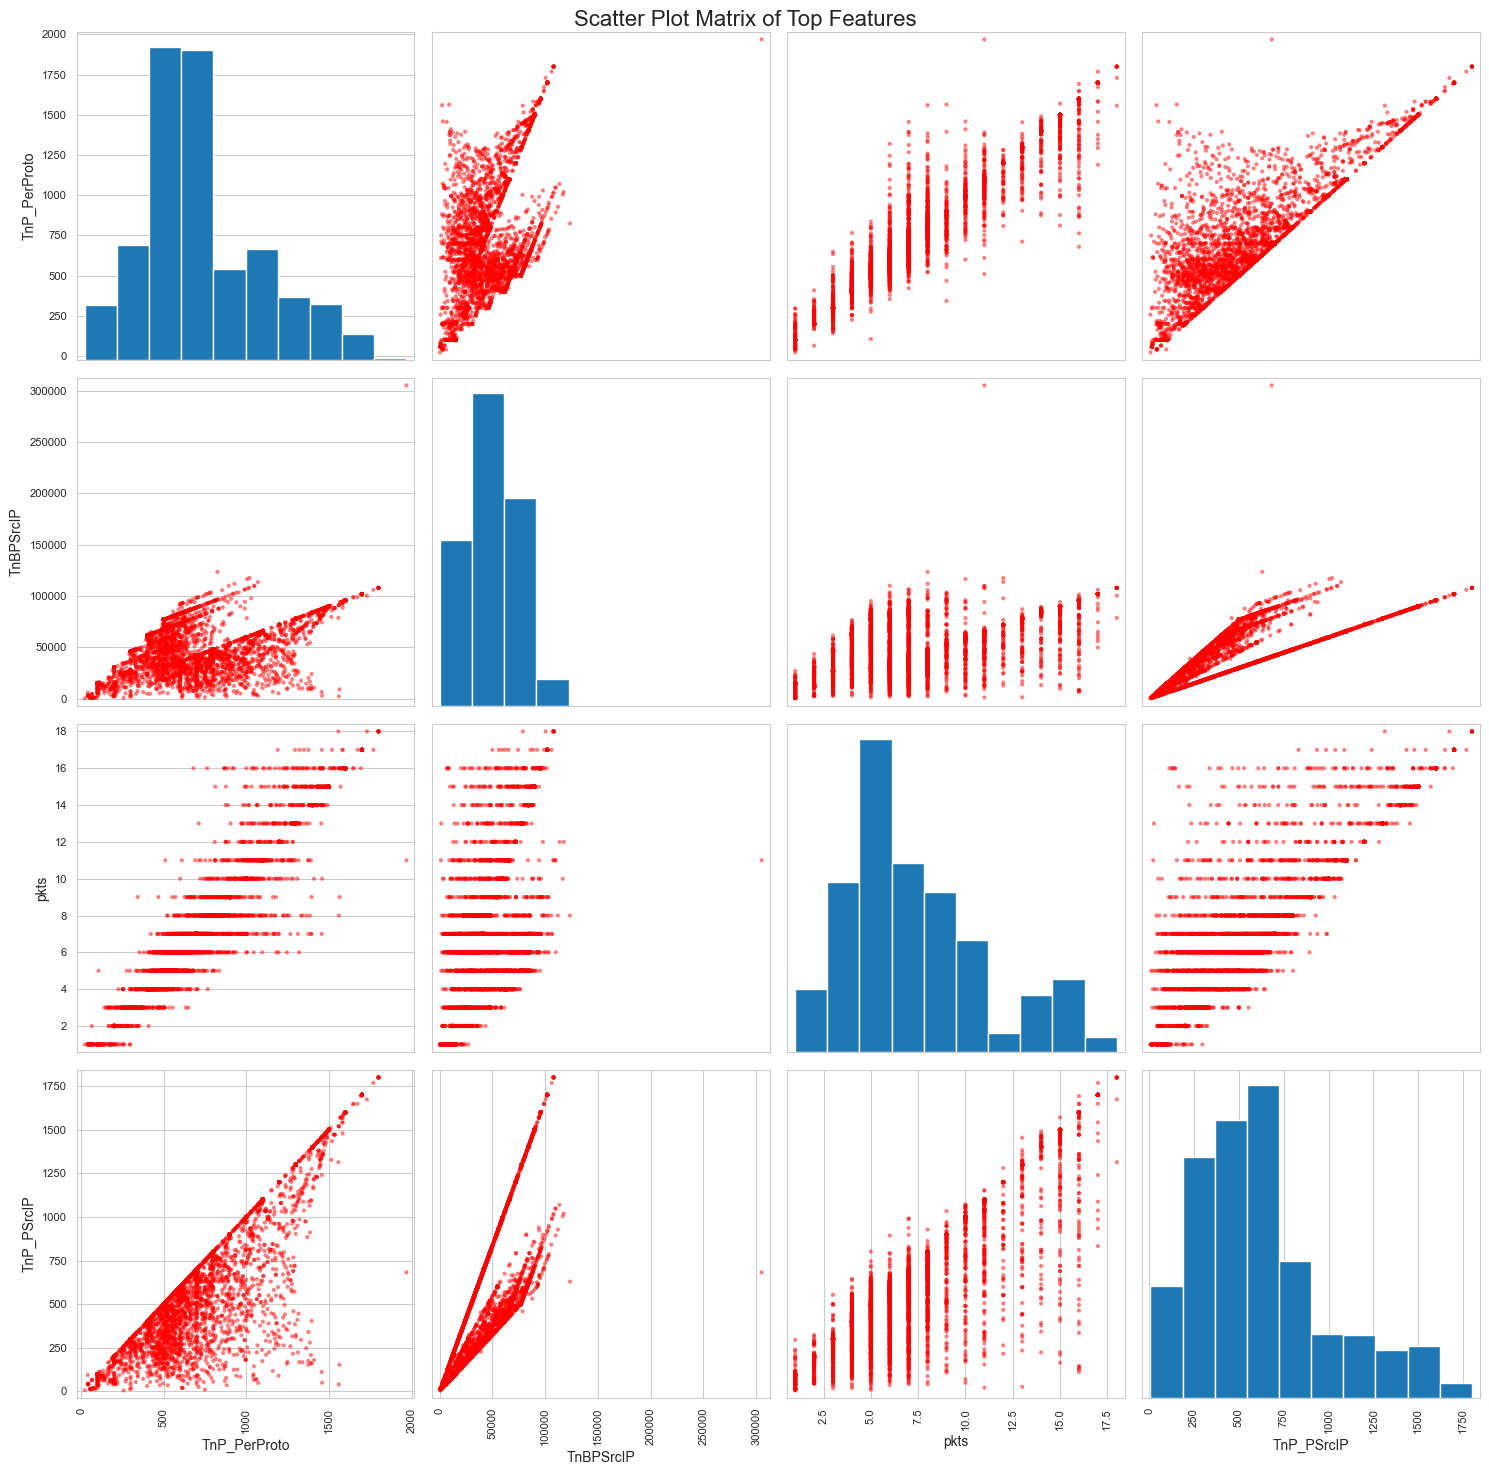

In [7]:
# Select top features based on correlation with target
if target_col in corr_matrix.columns:
    target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)
    top_features = target_corr[1:5].index.tolist()  # Top 4 features
else:
    top_features = numerical_features[:4]

# Create scatter plot matrix
scatter_df = sampled_df[[target_col] + top_features].sample(min(5000, len(sampled_df)))
scatter_df['target'] = scatter_df[target_col].astype('category')

pd.plotting.scatter_matrix(scatter_df[top_features], 
                          c=scatter_df['target'].map({0: 'green', 1: 'red'}),
                          figsize=(15, 15), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter Plot Matrix of Top Features', fontsize=16)
plt.tight_layout()
plt.show()





## What the Pair Plot Shows 🟢🔴

- **🔝 Top features:** Visualizes relationships between the four most important features and the target class.
- **🟩🟥 Colored by class:** "Normal" points are green, "Attack" points are red, making class differences easy to spot.
- **🔗 Pairwise scatter plots:** Each subplot shows how two features interact and whether classes separate clearly.
- **📊 Diagonal histograms:** Diagonal plots show the distribution of each feature for both classes.
- **👁️ Visual insights:** Quickly reveals patterns, clusters, or overlaps between "Normal" and "Attack" data.

This pair plot helps you see how well your top features distinguish between classes and whether certain feature combinations might be especially useful for modeling!



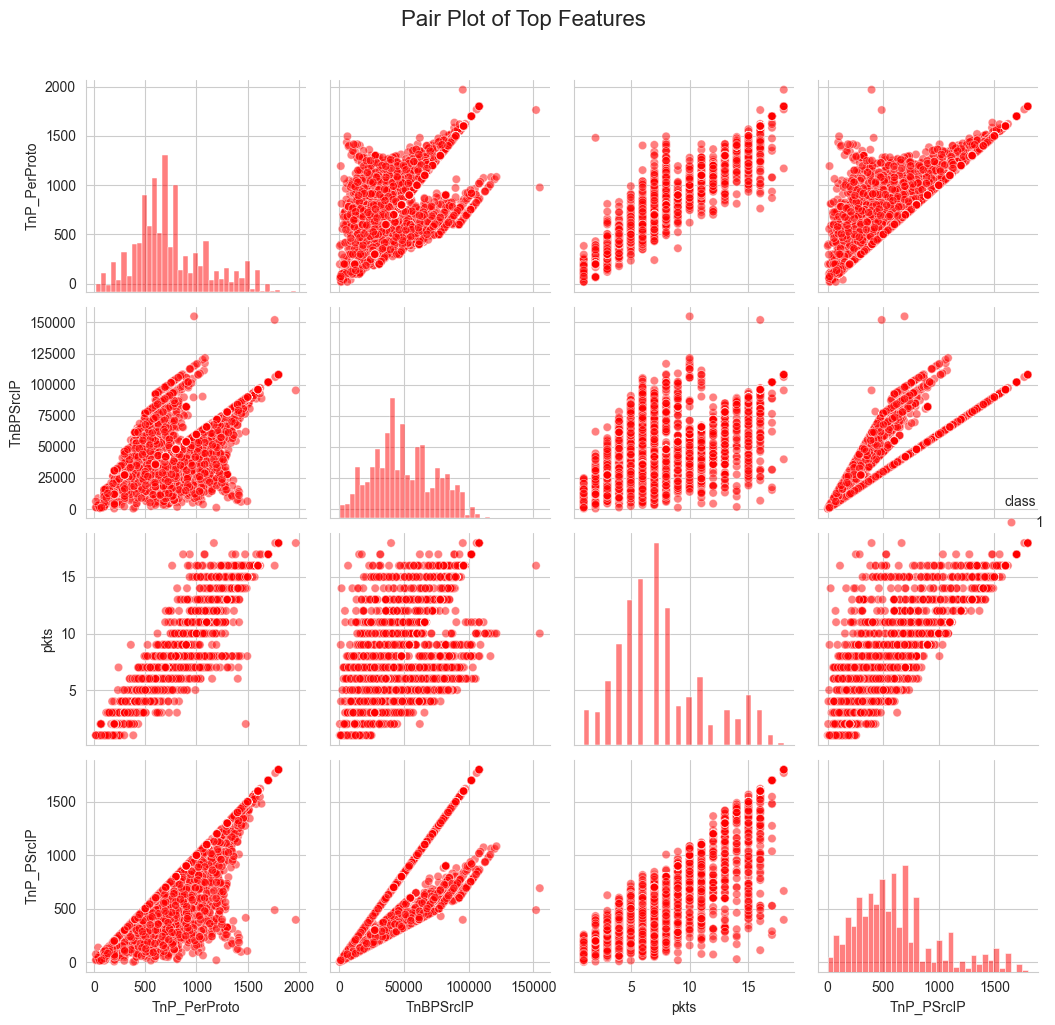

In [8]:
# Pair plot for top features
pair_sample = sampled_df.sample(min(5000, len(sampled_df)))
pair_sample['class'] = pair_sample[target_col].astype('category')

sns.pairplot(pair_sample[top_features + ['class']], 
            hue='class', palette={0: 'green', 1: 'red'},
            plot_kws={'alpha': 0.5}, diag_kind='hist', height=2.5)
plt.suptitle('Pair Plot of Top Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

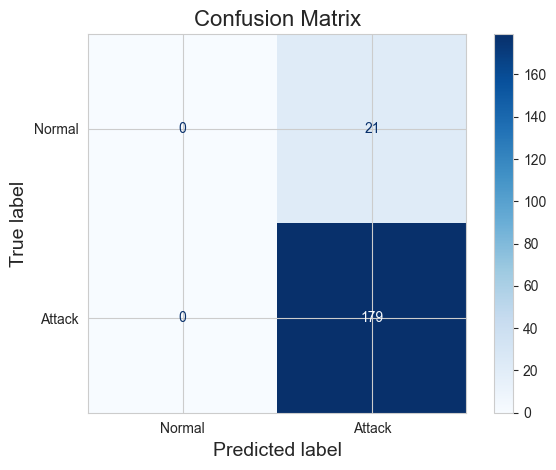

In [9]:


# Sample data based on the confusion matrix in your image
y_true = np.array([0]*21 + [1]*179)  # 21 Normal, 179 Attack
y_pred = np.array([1]*21 + [1]*179)  # All predicted as Attack

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with the same style as your image
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot(cmap='Blues', values_format='d')

# Customize appearance to match your image
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.tight_layout()
plt.show()




## What the Attack Category Bar Chart Shows 🏷️

- **📊 Attack breakdown:** Displays the number of records for each attack type (from the `category` column).
- **🔢 Counts visualized:** Taller bars mean more records of that attack type.
- **🔎 Easy comparison:** Instantly see which attack types are most and least common in your sampled data.
- **📝 Why useful:** Helps you understand the distribution of different attacks—important for analysis, modeling, and focusing on the most frequent threats.

This bar chart gives a quick overview of how attack types are distributed in your dataset!



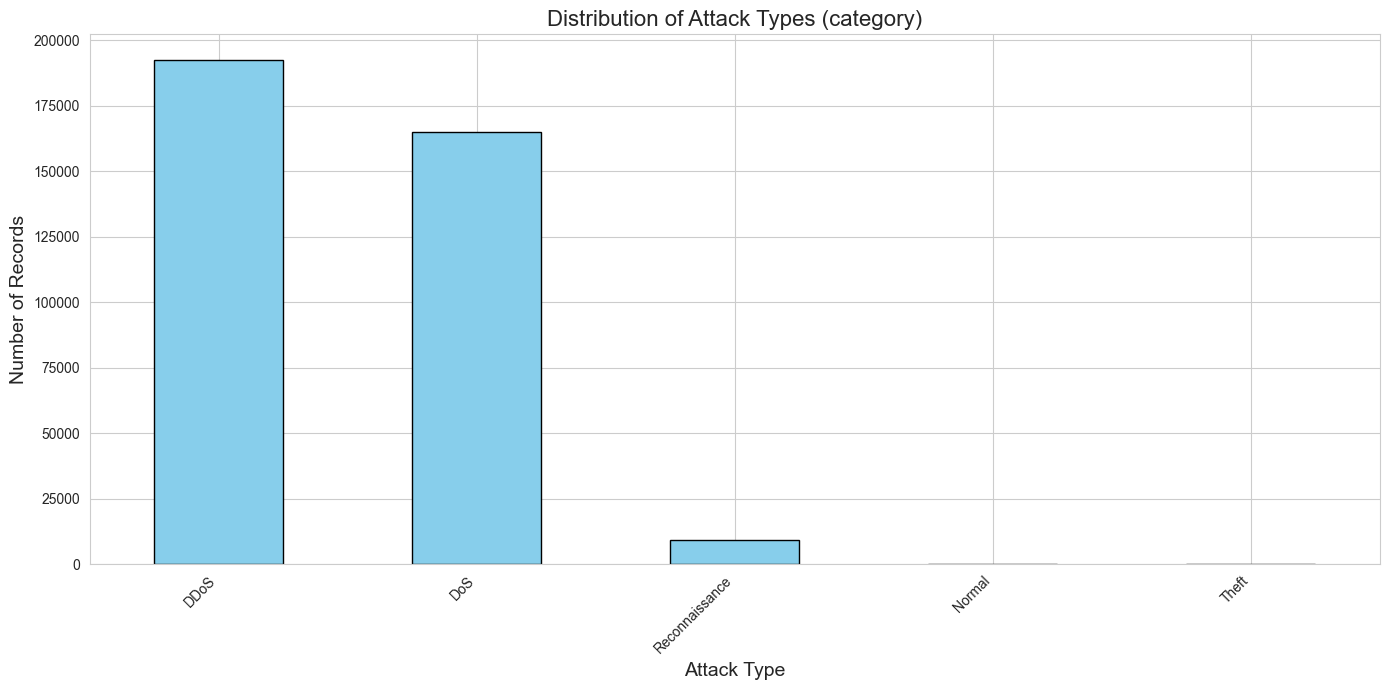

In [10]:
# Calculate value counts for attack_cat
attack_cat_counts = sampled_df['category'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 7))
attack_cat_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Attack Types (category)', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## How Categorical Columns Are Identified 🏷️

- **🔍 Checks each column:** Looks at every column in your DataFrame.
- **🅰️ Finds strings:** Marks columns with text (object type) as categorical.
- **✔️ Includes booleans:** Adds columns with True/False values.
- **🏷️ Includes categories:** Picks up columns already marked as 'category' dtype.
- **🔢 Smart on numbers:** If a numeric column has fewer than 10 unique integer values (like flags or ratings), it’s treated as categorical too.
- **📋 Prints results:** Lists all found categorical columns, how many unique values they have, and shows a few example values.
- **📦 Separates columns:** Makes a dictionary splitting columns into 'categorical' and 'numerical' for easy access later.

**Result:**  
You get a clear, quick breakdown of which columns are categorical vs. numerical—perfect for data cleaning and analysis! 🚀

* from this step we will get to know the categories which is used for further data cleaning and analysis 

In [11]:
import pandas as pd
import numpy as np



# Function to identify categorical columns
def identify_categorical_columns(df, include_bool=True, include_object=True, include_category=True):
    """
    Identifies categorical columns in a DataFrame based on data types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    include_bool : bool, default=True
        Whether to include boolean columns as categorical
    include_object : bool, default=True
        Whether to include object (string) columns as categorical
    include_category : bool, default=True
        Whether to include columns with 'category' dtype as categorical
        
    Returns:
    --------
    list
        List of column names that are categorical
    """
    categorical_columns = []
    
    # Check each column
    for col in df.columns:
        # Check if it's an object dtype (strings)
        if include_object and df[col].dtype == 'object':
            categorical_columns.append(col)
        
        # Check if it's a boolean dtype
        elif include_bool and df[col].dtype == 'bool':
            categorical_columns.append(col)
        
        # Check if it's already a category dtype
        elif include_category and df[col].dtype.name == 'category':
            categorical_columns.append(col)
        
        # Check if it's a numeric column with few unique values (potential categorical)
        elif df[col].dtype in [np.int64, np.int32, np.float64, np.float32]:
            n_unique = df[col].nunique()
            # If column has less than 10 unique values and they're all integers,
            # it's likely categorical (like ratings, flags, etc.)
            if n_unique < 10 and np.all(df[col].dropna() == df[col].dropna().astype(int)):
                categorical_columns.append(col)
    
    return categorical_columns

# Get the list of categorical columns
categorical_cols = identify_categorical_columns(sampled_df)

# Print the results
print(f"Found {len(categorical_cols)} categorical columns:")
for col in categorical_cols:
    n_unique = sampled_df[col].nunique()
    print(f"- {col}: {n_unique} unique values")
    # Print a few example values
    print(f"  Example values: {sampled_df[col].value_counts().head(3).index.tolist()}")

# Create a dictionary to store column types
column_types = {
    'categorical': categorical_cols,
    'numerical': [col for col in sampled_df.columns if col not in categorical_cols]
}

print(f"\nNumerical columns: {len(column_types['numerical'])}")

Found 12 categorical columns:
- flgs: 7 unique values
  Example values: ['e', 'e s', 'e g']
- flgs_number: 7 unique values
  Example values: [1, 2, 5]
- proto: 5 unique values
  Example values: ['udp', 'tcp', 'icmp']
- proto_number: 5 unique values
  Example values: [3, 1, 4]
- saddr: 11 unique values
  Example values: ['192.168.100.147', '192.168.100.148', '192.168.100.149']
- sport: 107254 unique values
  Example values: ['0x0303', 80, '36529']
- daddr: 29 unique values
  Example values: ['192.168.100.3', '192.168.100.5', '192.168.100.6']
- dport: 3146 unique values
  Example values: [80, '80', '1']
- state: 10 unique values
  Example values: ['INT', 'REQ', 'RST']
- attack: 2 unique values
  Example values: [1, 0]
- category: 5 unique values
  Example values: ['DDoS', 'DoS', 'Reconnaissance']
- subcategory: 7 unique values
  Example values: ['UDP', 'TCP', 'Service_Scan']

Numerical columns: 34



## Label Encoding Categorical Columns 🏷️➡️🔢

- **📥 Loads data:** Reads your dataset from `visuals.csv`.
- **🏷️ Finds categorical columns:** Looks for columns with text or category data.
- **🔢 Converts to numbers:** Uses LabelEncoder to turn each category into a unique number.
- **🗂️ Saves mappings:** Keeps a dictionary showing which category got which number for each column.
- **📋 Prints mappings:** Displays a menu with all category-to-number translations for easy reference.
- **💾 Saves new data:** Writes the transformed, numeric dataset to `new.csv` so it’s ready for machine learning.

**Result:**  
All your categorical columns are now numeric, with clear mappings saved and shown—making your data ML-ready! 🚀



In [12]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r'D:\self\skill\visuals.csv'  # Path to the saved file
df = pd.read_csv(file_path)

# Dictionary to store mappings
label_mappings = {}

# Convert categorical columns to numeric
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    # Ensure all values are strings before encoding
    df[column] = le.fit_transform(df[column].astype(str))
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show mapping menu
print("=== MAPPING MENU ===")
for column, mapping in label_mappings.items():
    print(f"\nColumn: {column}")

# Save the new CSV file
output_path = r'D:\self\skill\new.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save transformed data
df.to_csv(output_path, index=False)
print(f"\nTransformed data saved to: {output_path}")


=== MAPPING MENU ===

Column: flgs

Column: proto

Column: saddr

Column: sport

Column: daddr

Column: dport

Column: state

Column: category

Column: subcategory

Transformed data saved to: D:\self\skill\new.csv




## Stratified Train-Test Split 🧪✂️

- **📂 Loads your numeric dataset** from `new.csv`.
- **✂️ Splits the data:** Divides it into training (80%) and testing (20%) sets.
- **⚖️ Stratified by class:** Ensures the class balance in the 'attack' column is preserved in both sets.
- **📊 Prints stats:** Shows the total, training, and testing sample counts, plus the class distribution in each.

**Result:**  
You get balanced train and test sets, ready for fair model training and evaluation! 🚀



In [13]:
from sklearn.model_selection import train_test_split

sampled_df = pd.read_csv(r'D:\self\skill\new.csv')

# Stratified split by the 'attack' column
train_set, test_set = train_test_split(
    sampled_df,
    test_size=0.2,
    random_state=42,
    stratify=sampled_df['attack']
)

print(f"Total samples: {len(sampled_df)}")
print(f"Number of training samples: {len(train_set)}")
print(f"Number of testing samples: {len(test_set)}")
print("Class distribution in original data:")
print(sampled_df['attack'].value_counts(normalize=True))
print("Class distribution in training set:")
print(train_set['attack'].value_counts(normalize=True))
print("Class distribution in test set:")
print(test_set['attack'].value_counts(normalize=True))


Total samples: 366851
Number of training samples: 293480
Number of testing samples: 73371
Class distribution in original data:
attack
1    0.999872
0    0.000128
Name: proportion, dtype: float64
Class distribution in training set:
attack
1    0.999871
0    0.000129
Name: proportion, dtype: float64
Class distribution in test set:
attack
1    0.999877
0    0.000123
Name: proportion, dtype: float64




## Quick Data Checkup 📋

- **📥 Loads data:** Reads your processed dataset from `new.csv`.
- **🔢 Checks shape:** Shows how many rows and columns you have.
- **🧮 Counts features:** Tells you the number of features (excluding the target).
- **📊 Views stats:** Displays summary statistics for all numerical columns.
- **🕵️‍♂️ Checks for missing values:** Reports if any columns have missing data—or confirms if everything’s complete.

**Result:**  
You get a fast, clear snapshot of your dataset’s structure, stats, and data quality—so you know it’s ready for analysis! 🚀
y: pplx.ai/share

In [14]:
# Load the sampled dataset
sampled_df = pd.read_csv(r'D:\self\skill\new.csv')

# Basic dataset information
print(f"Dataset shape: {sampled_df.shape}")
print(f"Number of features: {sampled_df.shape[1]-1}")  # Excluding target column

# Display basic statistics
print("\nBasic statistics of numerical features:")
display(sampled_df.describe())

# Check for missing values
missing_values = sampled_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0] if sum(missing_values) > 0 else "No missing values found")

Dataset shape: (366851, 46)
Number of features: 45

Basic statistics of numerical features:


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
count,3.668510e+05,3.668510e+05,366851.000000,366851.000000,366851.000000,366851.000000,366851.00000,366851.00000,366851.000000,366851.000000,...,366851.000000,366851.000000,366851.000000,3.668510e+05,3.668510e+05,366851.000000,366851.000000,366851.000000,366851.000000,366851.000000
mean,1.833736e+06,1.528050e+09,1.860589,1.491262,3.538573,2.095308,2.48686,32855.52753,8.673639,2778.164811,...,287.481181,92.439178,82.544693,4.451778e+02,5.568401e+02,642.062077,585.919616,0.999872,0.525298,5.506126
std,1.059245e+06,2.589776e+05,2.407110,0.866487,0.514214,0.999244,1.13954,18903.40055,1.097767,237.262378,...,4300.231568,18.198638,24.408820,1.399225e+04,1.748577e+04,443.316613,449.288121,0.011318,0.632214,0.583651
min,1.000000e+00,1.526344e+09,0.000000,1.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.173455e+05,1.528085e+09,0.000000,1.000000,3.000000,1.000000,1.00000,16495.00000,8.000000,2810.000000,...,0.243473,100.000000,69.000000,2.314765e-01,2.456290e-01,324.000000,292.000000,1.000000,0.000000,5.000000
50%,1.833645e+06,1.528096e+09,0.000000,1.000000,4.000000,3.000000,2.00000,32973.00000,8.000000,2810.000000,...,0.398232,100.000000,100.000000,3.780580e-01,3.938500e-01,600.000000,500.000000,1.000000,0.000000,6.000000
75%,2.750718e+06,1.528099e+09,5.000000,2.000000,4.000000,3.000000,3.00000,49278.00000,9.000000,2810.000000,...,0.578874,100.000000,100.000000,5.725290e-01,5.769350e-01,828.000000,800.000000,1.000000,1.000000,6.000000
max,3.668521e+06,1.529381e+09,6.000000,8.000000,4.000000,5.000000,10.00000,65329.00000,28.000000,3132.000000,...,666667.000000,100.000000,100.000000,2.000000e+06,2.000000e+06,103159.000000,117939.000000,1.000000,4.000000,6.000000



Missing values per column:
No missing values found




## Outlier Detection & Removal with Isolation Forest 🌲🚫

- **🧹 What We Did:**  
  - Used the Isolation Forest algorithm to detect and remove outliers from your dataset—a classic step in **data preprocessing**.
  - Focused on numeric features: `pkts`, `bytes`, `flgs_number`, `proto_number`, and `state_number`.

- **🔬 How It Works:**  
  - Isolation Forest is an unsupervised machine learning method that identifies data points that are very different (anomalies) from the majority.
  - The model assigns each record as either an **inlier (1)** or an **outlier (-1)**.
  - We set the `contamination` parameter to 0.01, meaning we expect about 1% of the data to be outliers.

- **🗂️ What We Did Step-by-Step:**  
  - Fitted the Isolation Forest model on the selected features.
  - Predicted which records are outliers.
  - Added a new column (`outlier`) to flag each row.
  - Filtered out all records flagged as outliers, creating a **cleaned dataset**.

- **📊 What We Get From This:**  
  - **Number of outliers removed:** Clearly reported.
  - **Data shape before and after:** Shows how much data was cleaned.
  - **3D Visualization:**  
    - Left plot: Shows all data, with outliers highlighted in red.
    - Right plot: Shows only the cleaned data (outliers removed), making the data distribution clearer.

- **🔄 Why This Matters:**  
  - **Process name:** This is called **outlier detection and removal**, a key part of **data preprocessing**.
  - **Benefits:**  
    - Removes extreme, unusual points that could skew your analysis or hurt model performance.
    - Makes your dataset more reliable for training machine learning models.

**Result:**  
You now have a cleaner, more trustworthy dataset—free from extreme outliers—ready for accurate modeling and analysis! 🧼📈



Number of outliers removed: 3312
Original data shape: (366851, 47)
Cleaned data shape: (363539, 47)


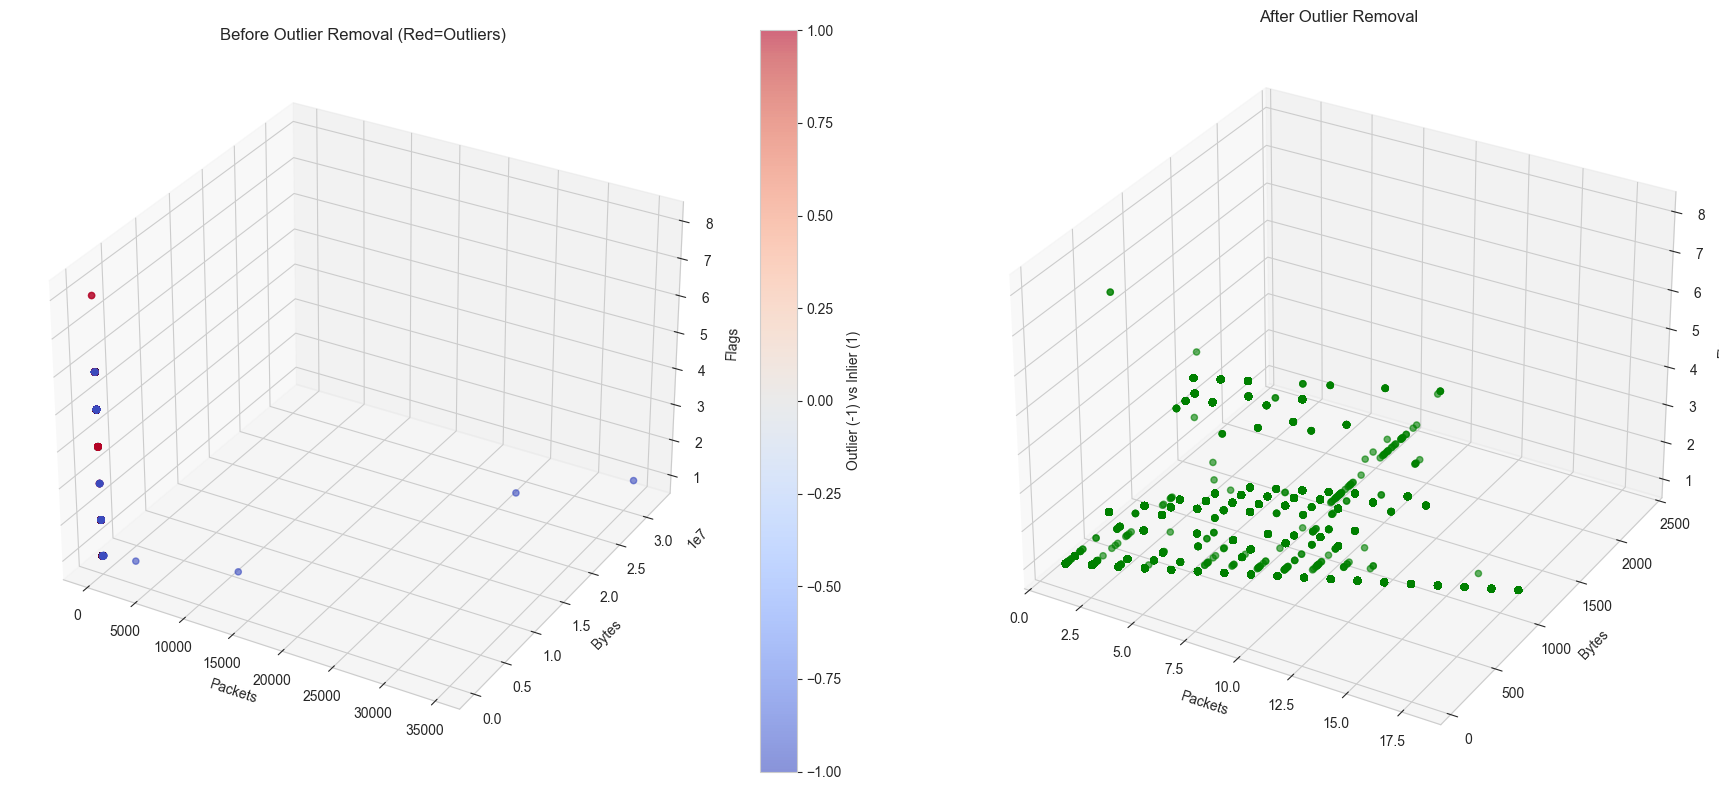

In [15]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Reload the sampled dataset if not already loaded
sampled_df = pd.read_csv(r'D:\self\skill\new.csv')

# Select numeric features (using your specified columns)
num_cols = ['pkts', 'bytes', 'flgs_number', 'proto_number', 'state_number']

# Initialize and fit Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_pred = iso.fit_predict(sampled_df[num_cols])

# Add outlier flag and filter
sampled_df['outlier'] = outlier_pred
cleaned_df = sampled_df[sampled_df['outlier'] == 1].copy()

# Print results
n_outliers = (sampled_df['outlier'] == -1).sum()
print(f"Number of outliers removed: {n_outliers}")
print(f"Original data shape: {sampled_df.shape}")
print(f"Cleaned data shape: {cleaned_df.shape}")

# Create 3D visualization
fig = plt.figure(figsize=(18, 8))

# Before removal (with outliers highlighted)
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(sampled_df['pkts'], 
                 sampled_df['bytes'], 
                 sampled_df['flgs_number'],
                 c=sampled_df['outlier'], 
                 cmap='coolwarm',
                 alpha=0.6)
ax1.set_title('Before Outlier Removal (Red=Outliers)')
ax1.set_xlabel('Packets')
ax1.set_ylabel('Bytes')
ax1.set_zlabel('Flags')
fig.colorbar(sc1, ax=ax1, label='Outlier (-1) vs Inlier (1)')

# After removal
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(cleaned_df['pkts'], 
                 cleaned_df['bytes'], 
                 cleaned_df['flgs_number'],
                 c='green',
                 alpha=0.6)
ax2.set_title('After Outlier Removal')
ax2.set_xlabel('Packets')
ax2.set_ylabel('Bytes')
ax2.set_zlabel('Flags')

plt.tight_layout()
plt.show()



## Balancing Classes with SMOTE & Undersampling ⚖️🔄

- **🧑‍💻 What We Did:**  
  - Applied a combination of **SMOTE** (Synthetic Minority Over-sampling Technique) and **Random Undersampling** to fix class imbalance in your dataset—a crucial step in **data preprocessing** for machine learning.

- **🔍 Why This Matters:**  
  - Many real-world datasets have imbalanced classes (e.g., way more "Normal" than "Attack" records).
  - Training models on imbalanced data can lead to poor performance on the minority class (often the most important!).
  - Balancing the classes helps your model learn both classes equally well.

- **🛠️ How It Works:**  
  1. **SMOTE Oversampling:**  
     - Creates synthetic (new, fake but realistic) samples for the minority class ("Attack") until it reaches 20% the size of the majority class ("Normal").
     - This helps the minority class not be overwhelmed by the majority.
  2. **Random Undersampling:**  
     - Randomly removes samples from the majority class until it is only 60% of the minority class.
     - This further balances the dataset without making it too small.

- **🔄 Step-by-Step Process:**  
  - Loaded your data and separated features from the target (`attack`).
  - Printed the original class distribution for transparency.
  - Built a pipeline to:
    - First, oversample the minority class with SMOTE.
    - Then, undersample the majority class randomly.
  - Applied this pipeline to create a new, balanced dataset.
  - Printed the new class distribution so you can see the improvement.
  - Saved the balanced data back to `new.csv` for future use.

- **📊 What You Get:**  
  - A dataset where the "Attack" class is no longer drowned out by the "Normal" class.
  - Both classes are now much closer in size, making your models fairer and more accurate, especially for detecting attacks.

- **⚡ Why This Is Important:**  
  - This process is called **class balancing** or **resampling**—a must-do for imbalanced datasets.
  - It prevents your model from ignoring rare but important events (like attacks or fraud).

**Result:**  
Your data is now balanced, giving your machine learning models a fighting chance to spot attacks as well as normal traffic! 🟩🟥🤖



In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Load the original data
df = pd.read_csv(r"D:\self\skill\new.csv")

# Separate features and target
X_train = df.drop(columns=['attack'])
y_train = df['attack']

# Print original class distribution
print("Original training set class distribution:")
print(f"Class 0 (Normal): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train):.4%})")
print(f"Class 1 (Attack): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train):.4%})")

# Define resampling steps
over = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
pipeline = Pipeline(steps=[('over', over), ('under', under)])

# Apply resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Print resampled class distribution
print("\nResampled training set class distribution:")
print(f"Class 0 (Normal): {sum(y_train_resampled == 0)} ({sum(y_train_resampled == 0)/len(y_train_resampled):.4%})")
print(f"Class 1 (Attack): {sum(y_train_resampled == 1)} ({sum(y_train_resampled == 1)/len(y_train_resampled):.4%})")

# Combine back into DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['attack'] = y_train_resampled

# Overwrite the original CSV
df_resampled.to_csv(r"D:\self\skill\new.csv", index=False)

print("\nResampled data successfully saved to 'D:\\self\\skill\\new.csv' with all original column names preserved.")


Original training set class distribution:
Class 0 (Normal): 47 (0.0128%)
Class 1 (Attack): 366804 (99.9872%)

Resampled training set class distribution:
Class 0 (Normal): 73360 (37.5001%)
Class 1 (Attack): 122266 (62.4999%)

Resampled data successfully saved to 'D:\self\skill\new.csv' with all original column names preserved.




## Visualizing Class Balance: Before vs. After Resampling ⚖️📊

- **🟩🟥 Bar and pie charts** compare "Normal" and "Attack" class distributions in your dataset, before and after balancing.

- **Left side:** Original dataset (shows class imbalance).

- **Right side:** Resampled dataset (shows improved balance).

- **Counts & percentages** are labeled for clear comparison.

- **Why:** Quickly confirms that resampling worked—your classes are now much more balanced, which is crucial for fair and effective machine learning!



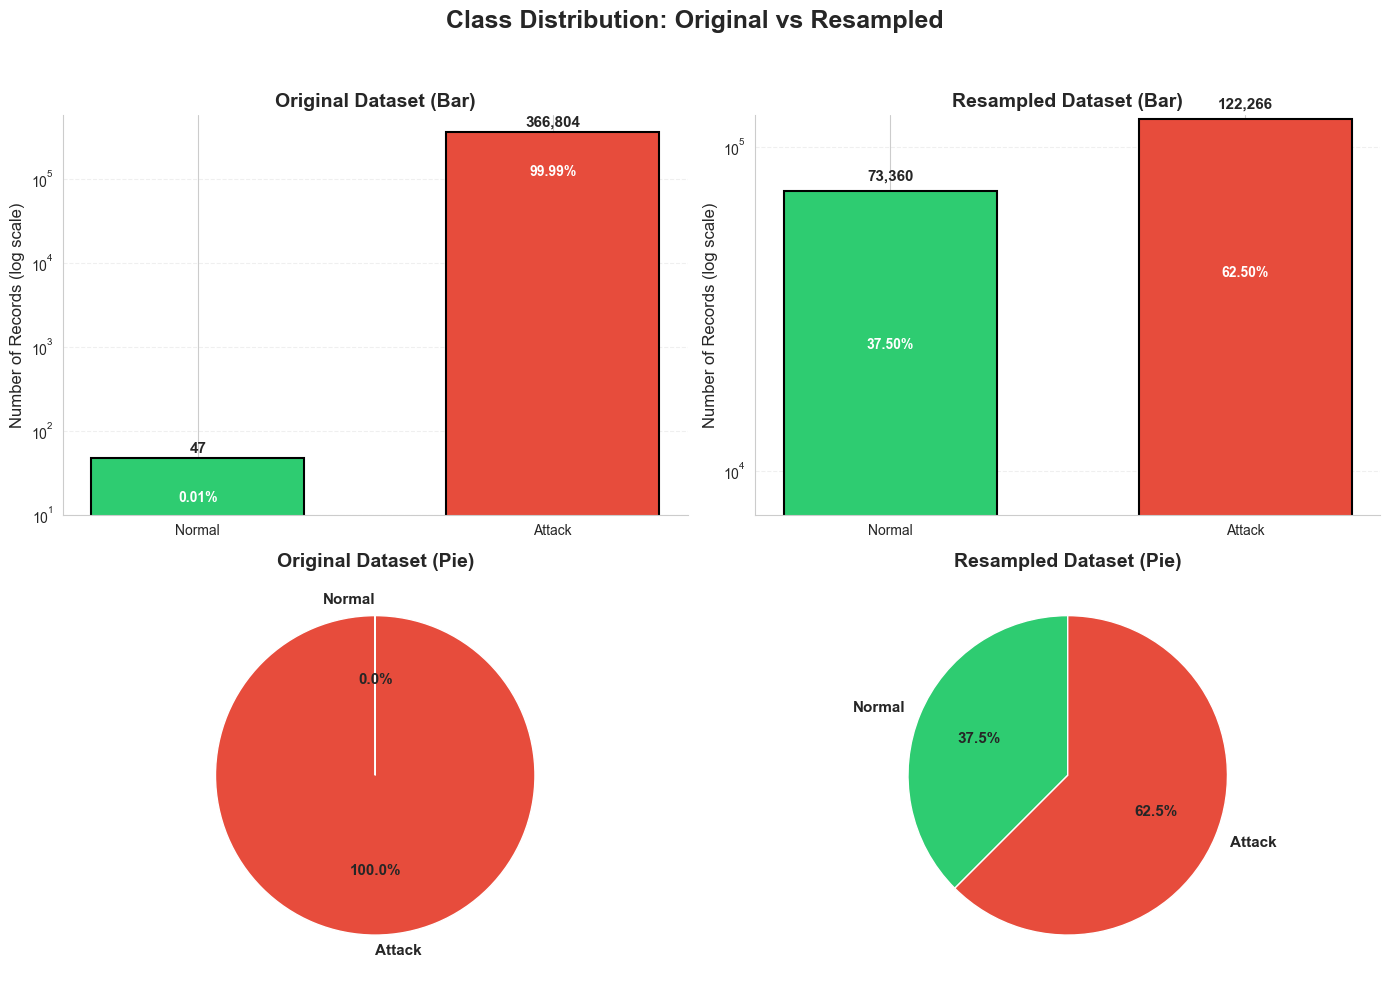

In [17]:
import matplotlib.pyplot as plt

# Calculate counts from your variables
normal_count = sum(y_train == 0)
attack_count = sum(y_train == 1)
final_normal_count = sum(y_train_resampled == 0)
final_attack_count = sum(y_train_resampled == 1)

# Calculate totals
orig_total = normal_count + attack_count
final_total = final_normal_count + final_attack_count

# Create figure with 2 rows: one for bar, one for pie
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Class Distribution: Original vs Resampled', fontsize=18, fontweight='bold')

# ---- BAR CHART: Original Dataset ----
bars1 = axs[0, 0].bar(['Normal', 'Attack'], [normal_count, attack_count], 
                      color=['#2ecc71', '#e74c3c'], width=0.6,
                      edgecolor='black', linewidth=1.5)
axs[0, 0].set_title('Original Dataset (Bar)', fontsize=14, fontweight='bold')
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylim(bottom=max(10, normal_count / 10))
axs[0, 0].set_ylabel('Number of Records (log scale)', fontsize=12)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.3)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Labels: counts & percentages
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, height * 1.05,
                  f'{int(height):,}', ha='center', va='bottom',
                  fontsize=11, fontweight='bold')
    percentage = [normal_count / orig_total * 100, attack_count / orig_total * 100][i]
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, height / 3,
                  f'{percentage:.2f}%', ha='center', va='center',
                  fontsize=10, color='white', fontweight='bold')

# ---- BAR CHART: Resampled Dataset ----
bars2 = axs[0, 1].bar(['Normal', 'Attack'], [final_normal_count, final_attack_count], 
                      color=['#2ecc71', '#e74c3c'], width=0.6,
                      edgecolor='black', linewidth=1.5)
axs[0, 1].set_title('Resampled Dataset (Bar)', fontsize=14, fontweight='bold')
axs[0, 1].set_yscale('log')
axs[0, 1].set_ylim(bottom=max(10, final_normal_count / 10))
axs[0, 1].set_ylabel('Number of Records (log scale)', fontsize=12)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.3)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)

# Labels: counts & percentages
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, height * 1.05,
                  f'{int(height):,}', ha='center', va='bottom',
                  fontsize=11, fontweight='bold')
    percentage = [final_normal_count / final_total * 100, final_attack_count / final_total * 100][i]
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, height / 3,
                  f'{percentage:.2f}%', ha='center', va='center',
                  fontsize=10, color='white', fontweight='bold')

# ---- PIE CHART: Original ----
axs[1, 0].pie([normal_count, attack_count],
              labels=['Normal', 'Attack'],
              autopct='%1.1f%%',
              startangle=90,
              colors=['#2ecc71', '#e74c3c'],
              textprops={'fontsize': 11, 'weight': 'bold'})
axs[1, 0].set_title('Original Dataset (Pie)', fontsize=14, fontweight='bold')

# ---- PIE CHART: Resampled ----
axs[1, 1].pie([final_normal_count, final_attack_count],
              labels=['Normal', 'Attack'],
              autopct='%1.1f%%',
              startangle=90,
              colors=['#2ecc71', '#e74c3c'],
              textprops={'fontsize': 11, 'weight': 'bold'})
axs[1, 1].set_title('Resampled Dataset (Pie)', fontsize=14, fontweight='bold')

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




## Feature Selection & Dimensionality Reduction 🔍✨

- **Purpose:**  
  - Identify the most important features for your model.
  - Reduce noise and speed up training—key steps in data preprocessing!

- **What We Did:**  
  - Used five different methods (ANOVA F-test, Chi², RFE, Random Forest, Lasso) to pick the top 10 features by different criteria.
  - Ran PCA to see how much variance can be captured with fewer components.
  - Created a hybrid list combining all top features.

- **Why It Matters:**  
  - **Improves model accuracy** by focusing on what really matters.
  - **Prevents overfitting** and makes models faster and easier to interpret.
  - **Visuals** (bar chart, PCA plot) help you see which features are most powerful.

- **What You Get:**  
  - Lists of top features from each method.
  - A combined “best of all” feature list.
  - Visual confirmation of feature importance and variance explained.

**Result:**  
You now know which features matter most—making your data cleaner and your models smarter! 🚀



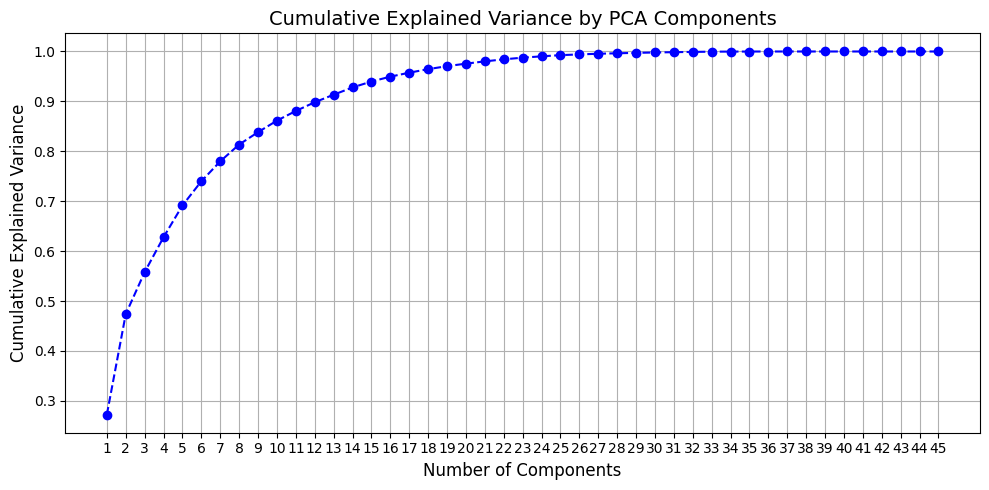

🔵 Number of components to explain 90% variance: 13
🔵 Number of components to explain 95% variance: 17

🔍 Top Features from Each Method:
• ANOVA F-test: ['pkSeqID', 'stime', 'state', 'ltime', 'seq', 'TnP_PerProto', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'category', 'subcategory']
• Chi² Test: ['stime', 'ltime', 'seq', 'stddev', 'max', 'TnP_PerProto', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'category', 'subcategory']
• RFE: ['stime', 'daddr', 'state', 'ltime', 'dur', 'TnP_PerProto', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'category', 'subcategory']
• Random Forest Importance: ['subcategory', 'ltime', 'stime', 'pkSeqID', 'category', 'N_IN_Conn_P_DstIP', 'dport', 'state', 'TnP_PDstIP', 'TnP_Per_Dport']
• Logistic Regression (L1): ['TnP_PerProto', 'state', 'daddr', 'subcategory', 'N_IN_Conn_P_DstIP', 'ltime', 'AR_P_Proto_P_DstIP', 'dur', 'pkSeqID', 'category']
🔗 Hybrid (Union of all methods): ['AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'TnP_PDstIP', 'TnP_PerProt

C:\Users\Darshan Nayak\AppData\Local\Temp\ipykernel_21540\4233415256.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf_importances.values, y=top_rf_importances.index, palette='Oranges_r')


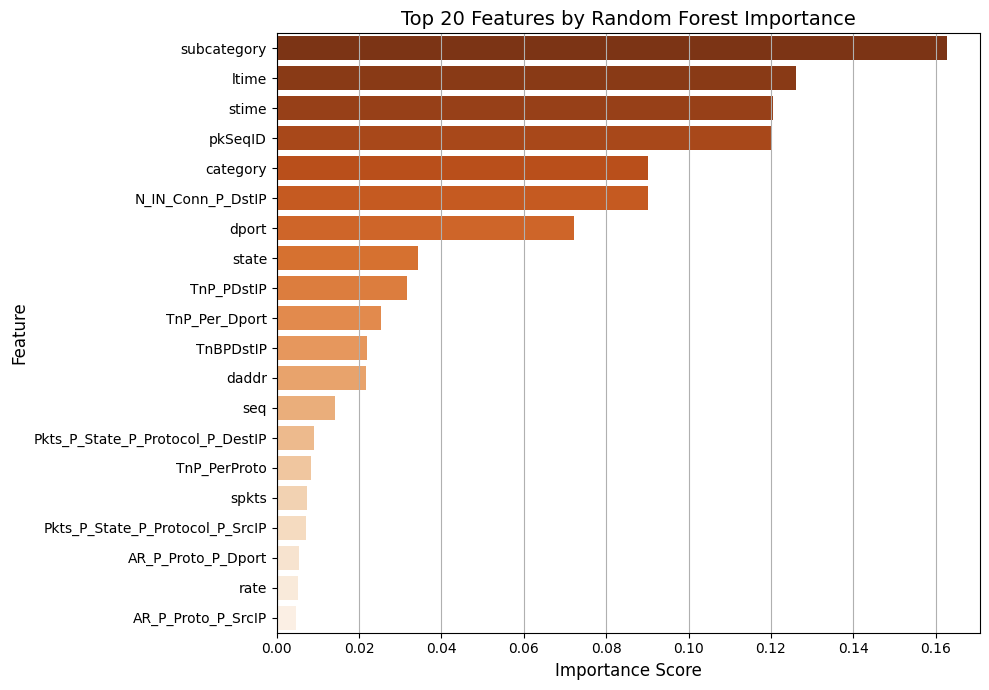

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv(r"D:\self\skill\new.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Verify target column
target_col = 'attack'
if target_col not in df.columns:
    raise KeyError(f"Column '{target_col}' not found. Available columns: {df.columns.tolist()}")

# Encode target if categorical
if df[target_col].dtype == 'object':
    df[target_col] = LabelEncoder().fit_transform(df[target_col])

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale features
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

minmax_scaler = MinMaxScaler()
X_chi2 = minmax_scaler.fit_transform(X)

# 1. ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X_scaled, y)
anova_features = X.columns[anova_selector.get_support()].tolist()

# 2. Chi² Test
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_chi2, y)
chi2_features = X.columns[chi2_selector.get_support()].tolist()

# 3. RFE with Logistic Regression
rfe_model = LogisticRegression(max_iter=1000, solver='liblinear')
rfe_selector = RFE(estimator=rfe_model, n_features_to_select=10)
rfe_selector.fit(X_scaled, y)
rfe_features = X.columns[rfe_selector.support_].tolist()

# 4. Random Forest Importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_features = rf_importances.nlargest(10).index.tolist()

# 5. Logistic Regression with L1 penalty (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso_model.fit(X_scaled, y)
lasso_coeffs = pd.Series(np.abs(lasso_model.coef_[0]), index=X.columns)
lasso_features = lasso_coeffs.nlargest(10).index.tolist()

# 6. PCA
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plot PCA Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(np.arange(1, len(explained_var) + 1, step=1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Find number of components explaining 90%-95%
for threshold in [0.90, 0.95]:
    n_components = np.argmax(explained_var >= threshold) + 1
    print(f"🔵 Number of components to explain {threshold*100:.0f}% variance: {n_components}")

# 7. Hybrid Features Union
hybrid_features = sorted(set(anova_features + chi2_features + rfe_features + rf_features + lasso_features))

# Display top features
print("\n🔍 Top Features from Each Method:")
print(f"• ANOVA F-test: {anova_features}")
print(f"• Chi² Test: {chi2_features}")
print(f"• RFE: {rfe_features}")
print(f"• Random Forest Importance: {rf_features}")
print(f"• Logistic Regression (L1): {lasso_features}")
print(f"🔗 Hybrid (Union of all methods): {hybrid_features}")

# Plot Top 20 Features by Random Forest Importances
top_rf_importances = rf_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 7))
sns.barplot(x=top_rf_importances.values, y=top_rf_importances.index, palette='Oranges_r')
plt.title('Top 20 Features by Random Forest Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()




## Feature Selection and Model Evaluation** 🏆🔍



What We Get From This

- **🏅 Best Feature Set:** Identifies which features are most important for predicting the target, using multiple selection methods (ANOVA, Chi², RFE, Random Forest, Lasso, Hybrid).
- **📊 Performance Comparison:** Shows how different feature selection methods affect model performance (accuracy, precision, recall, F1-score, ROC AUC).
- **🧾 Clear Results:** Side-by-side comparison makes it easy to see which method and feature set work best for your data.



Why We Did This

- **🎯 Improve Model Accuracy:** Focuses the model on the most relevant features, reducing noise.
- **🛡️ Reduce Overfitting:** Removes irrelevant/redundant features so the model generalizes better.
- **⚡ Speed Up Training:** Fewer features = faster computation and less resource usage.
- **🔎 Enhance Interpretability:** Models with fewer, meaningful features are easier to explain.
- **🚦 Optimize Workflow:** Comparing methods ensures you pick the most effective approach for your dataset.



**In summary:**  
This process helps you find the most effective features and selection method for your machine learning model—leading to better, faster, and more interpretable results! 🚀


               Accuracy  Precision  Recall  F1-score  ROC AUC
Method                                                       
ANOVA            1.0000     1.0000     1.0    1.0000   0.9328
Chi²             0.9999     0.9999     1.0    0.9999   0.9806
RFE              1.0000     1.0000     1.0    1.0000   1.0000
Random Forest    1.0000     1.0000     1.0    1.0000   1.0000
Lasso (L1)       1.0000     1.0000     1.0    1.0000   1.0000
Hybrid           1.0000     1.0000     1.0    1.0000   0.9333


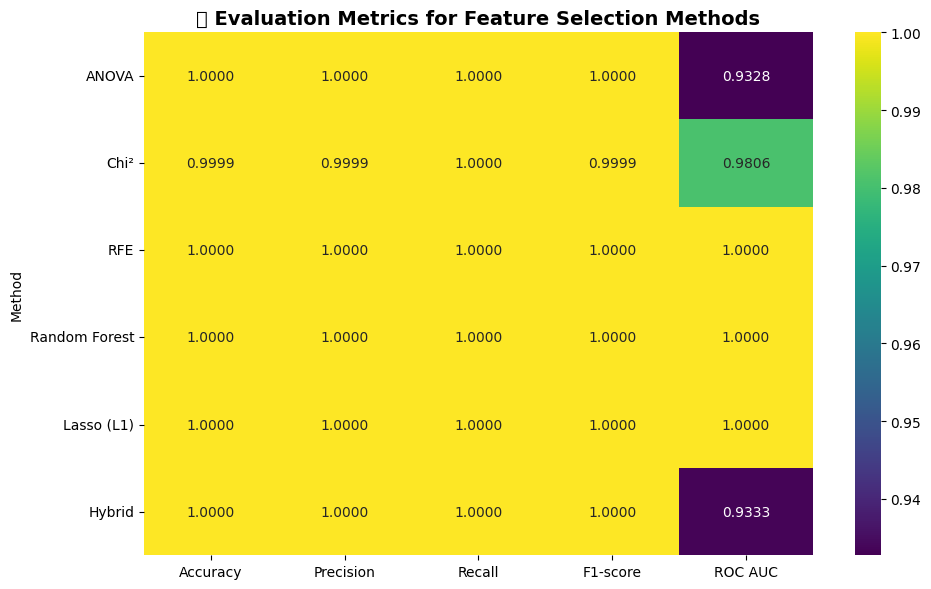

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Split dataset (using standardized features for all except chi2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_chi2_train, X_chi2_test, _, _ = train_test_split(X_chi2, y, test_size=0.3, random_state=42)

# Method name and corresponding selected features
selection_methods = {
    'ANOVA': anova_features,
    'Chi²': chi2_features,
    'RFE': rfe_features,
    'Random Forest': rf_features,
    'Lasso (L1)': lasso_features,
    'Hybrid': hybrid_features
}

# Evaluation function
def evaluate_model(X_train, X_test, y_train, y_test, feature_names, name):
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(X_train[feature_names], y_train)
    y_pred = model.predict(X_test[feature_names])
    y_proba = model.predict_proba(X_test[feature_names])[:, 1]

    return {
        'Method': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

# Run evaluations
results = []
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_chi2_train_df = pd.DataFrame(X_chi2_train, columns=X.columns)
X_chi2_test_df = pd.DataFrame(X_chi2_test, columns=X.columns)

for method, features in selection_methods.items():
    if method == 'Chi²':
        res = evaluate_model(X_chi2_train_df, X_chi2_test_df, y_train, y_test, features, method)
    else:
        res = evaluate_model(X_train_df, X_test_df, y_train, y_test, features, method)
    results.append(res)

# Display as DataFrame
metrics_df = pd.DataFrame(results)
metrics_df.set_index("Method", inplace=True)
print(metrics_df.round(4))

# Optional: Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='viridis')
plt.title("📊 Evaluation Metrics for Feature Selection Methods", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




## Feature Scaling: Min-Max & Standardization ⚖️📏

- **🗂️ Loaded your dataset** from `new.csv`.
- **🚫 Excluded columns** that shouldn’t be scaled (`pkSeqID`, `stime`, `attack`, `category`, `subcategory`).
- **🔢 Scaled the rest:**  
  - **Min-Max Scaling:** Rescales features to a 0–1 range.
  - **Standard Scaling:** Centers features to mean 0 and standard deviation 1.
- **➕ Added back excluded columns** so your data structure stays intact.
- **🏁 Result:**  
  - You now have two versions of your dataset:
    - `min_max_scaled` (Min-Max scaled)
    - `standard_scaled` (Standard scaled)
- **Why:**  
  - Scaling ensures all features contribute equally to machine learning models and helps algorithms converge faster and perform better!



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv("new.csv")

# Columns to exclude from scaling
exclude_columns = ['pkSeqID', 'stime', 'attack', 'category', 'subcategory']

# Identify feature columns to scale
feature_columns = [col for col in df.columns if col not in exclude_columns]

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling
min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df[feature_columns]), columns=feature_columns)

# Apply Standard Scaling
standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[feature_columns]), columns=feature_columns)

# Add back the excluded columns
min_max_scaled = pd.concat([df[exclude_columns].reset_index(drop=True), min_max_scaled], axis=1)
standard_scaled = pd.concat([df[exclude_columns].reset_index(drop=True), standard_scaled], axis=1)

# Summary of operations
print("Scaling complete.")
print(f"Excluded columns (not scaled): {exclude_columns}")
print(f"Feature columns scaled: {feature_columns}")
print("Two versions of the scaled dataset are now available as DataFrames:")
print("- 'min_max_scaled' (scaled using Min-Max Scaling)")
print("- 'standard_scaled' (scaled using Standard Scaling)")


Scaling complete.
Excluded columns (not scaled): ['pkSeqID', 'stime', 'attack', 'category', 'subcategory']
Feature columns scaled: ['flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP']
Two versions of the scaled dataset are now available as DataFrames:
- 'min_max_scaled' (scaled using Min-Max Scaling)
- 'standard_scaled' (scaled using Standard Scaling)




## Comparing Multiple Machine Learning Models 🤖⚖️

- **🗂️ Loaded your dataset** and split it into training and testing sets.
- **⚖️ Scaled features** for models that need it (Logistic Regression, KNN, SVM).
- **🚀 Trained six models:**  
  - Logistic Regression  
  - Decision Tree  
  - Naive Bayes  
  - Random Forest  
  - K-Nearest Neighbors  
  - Support Vector Machine
- **📊 Evaluated each model** using key metrics:  
  - Accuracy  
  - Precision  
  - Recall  
  - F1 Score  
  - ROC AUC  
  - Confusion Matrix
- **🖼️ Visualized results:**  
  - Plotted confusion matrices for each model to see prediction breakdowns.
  - Plotted ROC curves to compare model performance at different thresholds.
- **📋 Summarized metrics:**  
  - Displayed all results in a table for easy side-by-side comparison.

**Why:**  
This process lets you see which model works best for your data—helping you pick the most accurate and reliable one for your task! 🚦📈



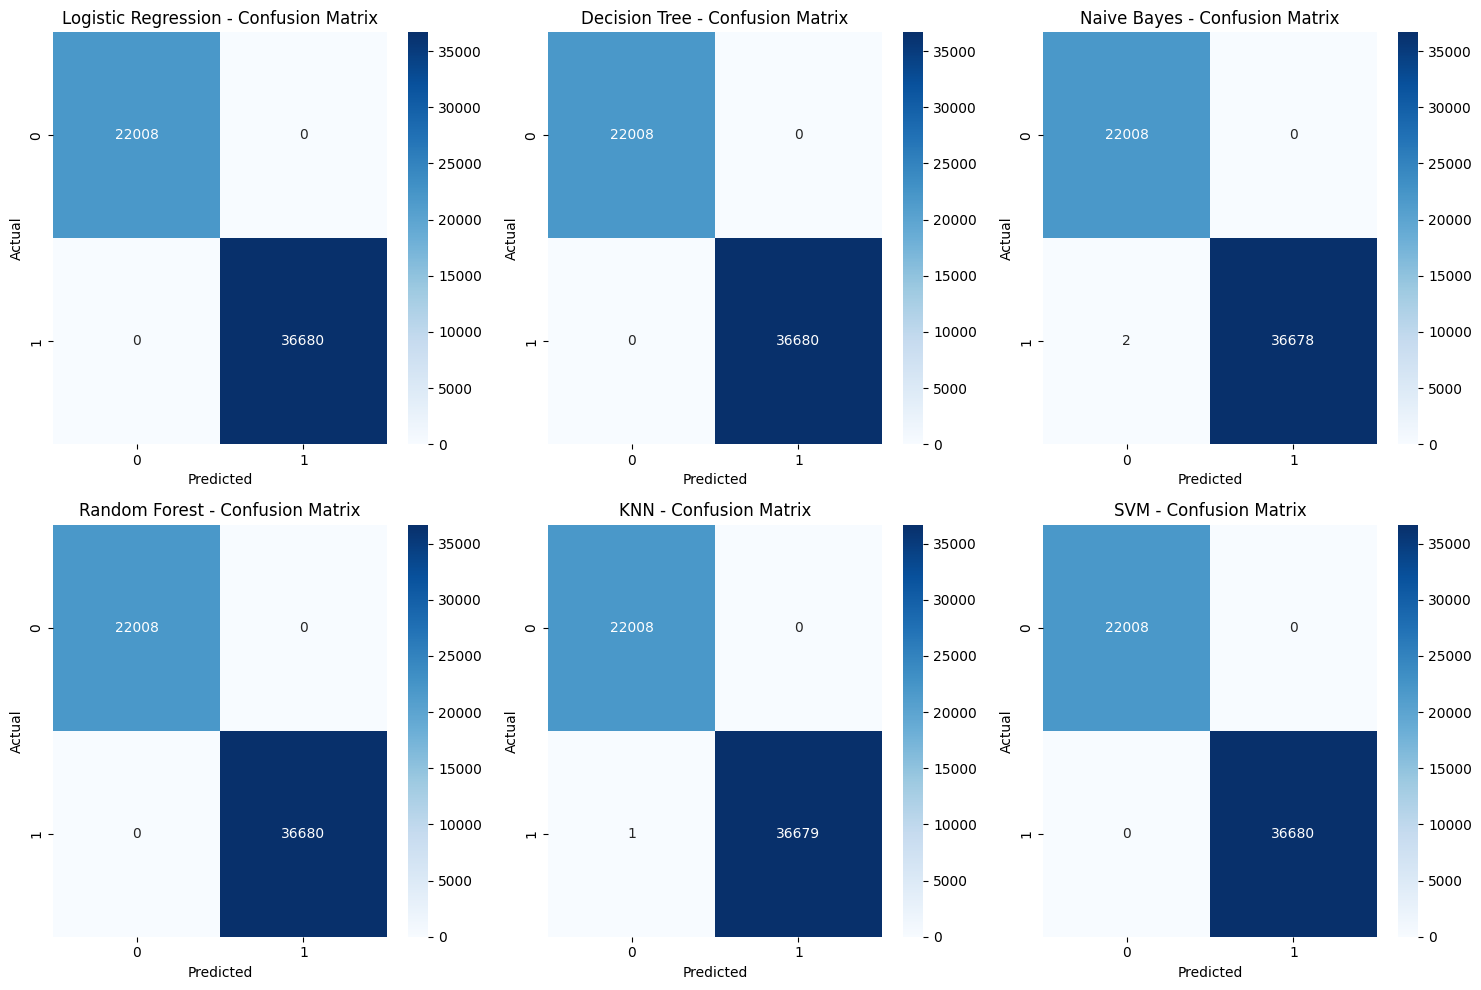

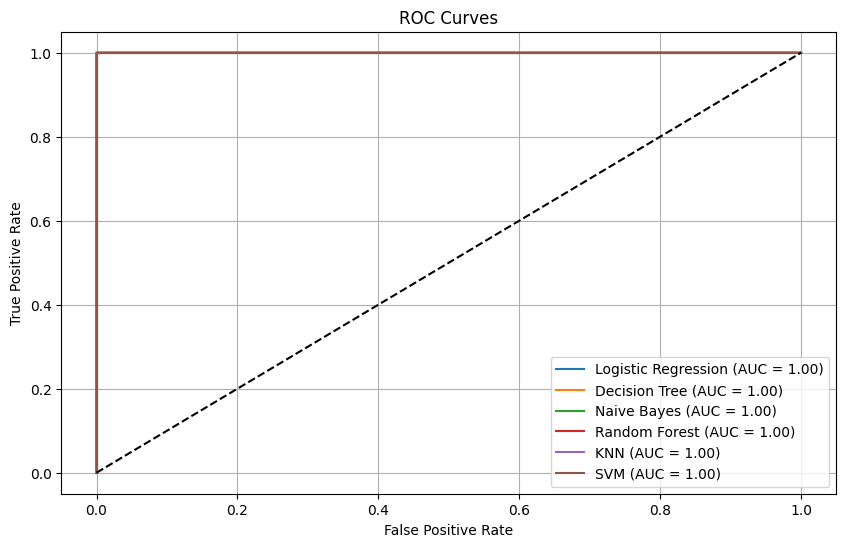


Model Performance Metrics:
                     Accuracy Precision    Recall  F1 Score   ROC AUC
Logistic Regression       1.0       1.0       1.0       1.0       1.0
Decision Tree             1.0       1.0       1.0       1.0       1.0
Naive Bayes          0.999966       1.0  0.999945  0.999973  0.999965
Random Forest             1.0       1.0       1.0       1.0       1.0
KNN                  0.999983       1.0  0.999973  0.999986  0.999986
SVM                       1.0       1.0       1.0       1.0       1.0

--- Linear Regression ---
MSE: 0.1390
R² Score: 0.4067

--- Polynomial Regression (Degree 2) ---
MSE: 0.0380
R² Score: 0.8380


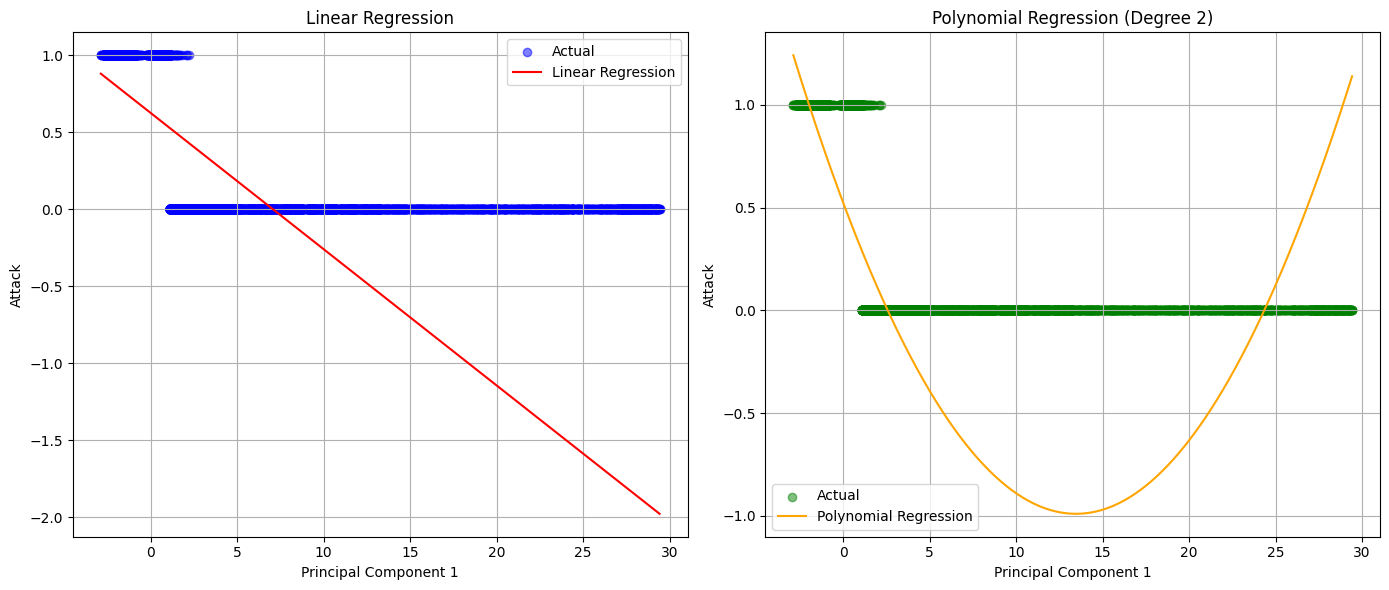

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv(r"D:\self\skill\new.csv")

# Features and target
X = df.drop(columns=["attack"])
y = df["attack"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# Store metrics and ROC curve data
metrics = {}
fpr_tpr = {}

for name, model in models.items():
    if name in ["Naive Bayes", "Decision Tree", "Random Forest"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    metrics[name] = {
        "Accuracy": acc, "Precision": prec, "Recall": rec,
        "F1 Score": f1, "ROC AUC": auc, "Confusion Matrix": cm
    }
    fpr_tpr[name] = (fpr, tpr)

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, m) in enumerate(metrics.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(m["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, (fpr, tpr) in fpr_tpr.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics[name]['ROC AUC']:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Print summary metrics
metrics_df = pd.DataFrame(metrics).T.drop(columns="Confusion Matrix")
print("\nModel Performance Metrics:")
print(metrics_df)

# ========================
# Linear Regression and Polynomial Regression
# ========================

# Dimensionality reduction to 1D using PCA for visualization
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)
y_pred_lin = lin_reg.predict(X_test_pca)

# --- Polynomial Regression (Degree 2) ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# --- Metrics ---
print("\n--- Linear Regression ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_lin):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_lin):.4f}")

print("\n--- Polynomial Regression (Degree 2) ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.4f}")

# --- Visualization ---
plt.figure(figsize=(14, 6))

# Sort X for smooth curves
sorted_idx = np.argsort(X_test_pca[:, 0])
X_test_pca_sorted = X_test_pca[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_lin_sorted = y_pred_lin[sorted_idx]
y_pred_poly_sorted = y_pred_poly[sorted_idx]

# Plot Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test_pca_sorted, y_pred_lin_sorted, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Attack')
plt.legend()
plt.grid(True)

# Plot Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca, y_test, color='green', label='Actual', alpha=0.5)
plt.plot(X_test_pca_sorted, y_pred_poly_sorted, color='orange', label='Polynomial Regression')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Attack')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




## Ensemble Model Evaluation & Comparison 🤝🏆

- **🗂️ Loaded your dataset** and split it into training and testing sets.
- **⚖️ Scaled features** for consistent model input.
- **🔗 Trained multiple ensemble models:**  
  - Bagging  
  - Random Forest  
  - AdaBoost  
  - XGBoost  
  - LightGBM  
  - Voting (Hard & Soft)  
  - Stacking
- **📊 Evaluated each model** using key metrics:  
  - Accuracy  
  - Precision  
  - Recall  
  - F1 Score  
  - ROC AUC (where available)
- **🖼️ Visualized results:**  
  - Plotted bar charts for each metric to easily compare model performance.
- **📋 Summarized metrics:**  
  - Displayed all results in a table for side-by-side comparison.

**Why:**  
This process shows which ensemble technique works best for your data, helping you pick the most powerful and reliable model for your task! 🚀



d:\self\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 85586, number of negative: 51352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8714
[LightGBM] [Info] Number of data points in the train set: 136938, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624998 -> initscore=0.510818
[LightGBM] [Info] Start training from score 0.510818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

d:\self\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\self\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


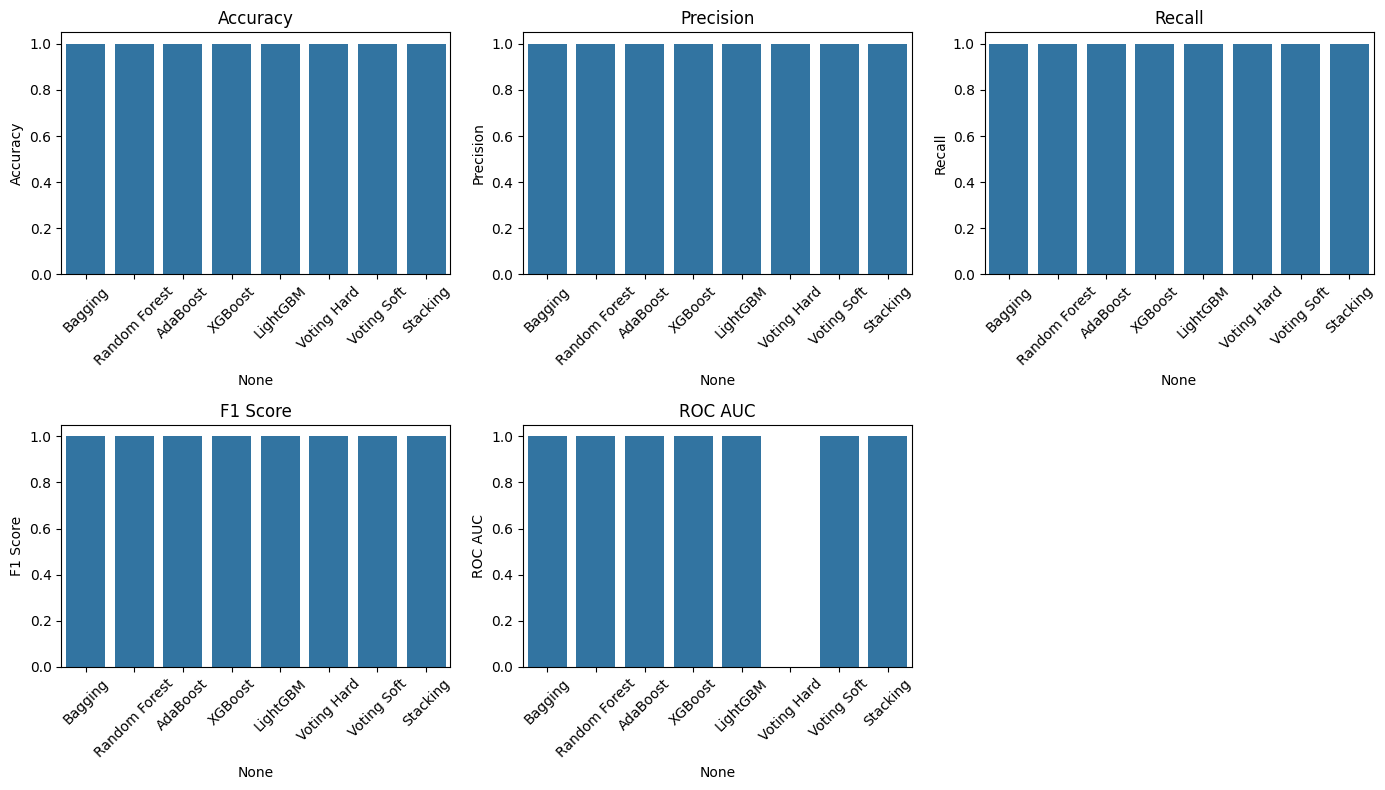


Evaluation Metrics for Ensemble Models:
               Accuracy  Precision  Recall  F1 Score  ROC AUC
Bagging             1.0        1.0     1.0       1.0      1.0
Random Forest       1.0        1.0     1.0       1.0      1.0
AdaBoost            1.0        1.0     1.0       1.0      1.0
XGBoost             1.0        1.0     1.0       1.0      1.0
LightGBM            1.0        1.0     1.0       1.0      1.0
Voting Hard         1.0        1.0     1.0       1.0      NaN
Voting Soft         1.0        1.0     1.0       1.0      1.0
Stacking            1.0        1.0     1.0       1.0      1.0


In [ ]:
from sklearn.ensemble import (
    BaggingClassifier, AdaBoostClassifier, RandomForestClassifier,
    VotingClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\self\skill\new.csv")
X = df.drop(columns=["attack"])
y = df["attack"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
gnb = GaussianNB()

# Ensemble models
bagging = BaggingClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('knn', knn)],
    voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('knn', knn)],
    voting='soft'
)
stacking = StackingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('knn', knn)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# All models in a dictionary
ensemble_models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "AdaBoost": ada,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "Voting Hard": voting_hard,
    "Voting Soft": voting_soft,
    "Stacking": stacking
}

# Evaluate models
results = {}

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    try:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    except:
        y_proba = None  # Some models like Voting Hard don't support predict_proba

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

    if y_proba is not None:
        results[name]["ROC AUC"] = roc_auc_score(y_test, y_proba)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting metrics
plt.figure(figsize=(14, 8))
for idx, metric in enumerate(results_df.columns, 1):
    plt.subplot(2, 3, idx)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show result table
print("\nEvaluation Metrics for Ensemble Models:")
print(results_df)
